I have imported the necessary packages that I would need for the implementation of this project.

The dataset I have used has been modified and labelled to do its data analysis

The data contains various timeseries divided into 4 classes c1, c2, c3 and c4

Each class has several timeseries'

The aim of this project is to get a basic understanding of a timeseries dataset given to us using data analytic techniques without actually knowing what the data is

In [2]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
import pickle
import seaborn as sns 
import sys
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

Importing the dataset and using the describe function to get the basic statistic data of the dataset

What the dataset actually contains is beyond the scope of this project as this is purely statistical analysis of the same

In [3]:
input_path = './'
onput_path = input_path
input_df = pd.read_csv(input_path + 'dataset1.csv')
input_df.describe()

1c1         2c1         3c1         4c1         5c1         6c1  \
count  134.000000  134.000000  134.000000  134.000000  134.000000  134.000000   
mean     9.897537   10.172567   10.251701   10.786134    9.974604   10.002619   
std      1.319701    0.624640    0.330176    0.436394    0.447472    0.360904   
min      6.175000    7.983000    9.543000    9.751000    8.714000    9.077000   
25%      9.135000    9.803750   10.010250   10.456000    9.691000    9.742750   
50%      9.921500   10.296000   10.310000   10.786500    9.968000   10.005000   
75%     10.807250   10.548000   10.455000   11.102250   10.189000   10.236750   
max     12.624000   11.869000   11.127000   12.065000   11.399000   10.703000   

              7c1         8c1         9c1        10c1  ...      1458c4  \
count  134.000000  134.000000  134.000000  134.000000  ...  134.000000   
mean    10.469246   10.190433   10.065440    9.737940  ...    8.286714   
std      0.742989    0.599430    0.297255    0.372525  ...    1.904402   
min      8.097000    8.571000    9.348000    8.909000  ...    1.796000   
25%     10.125000    9.869750    9.880500    9.431750  ...    7.135250   
50%     10.577000   10.174000   10.072000    9.770000  ...    8.188500   
75%     10.915750   10.589500   10.295000   10.010500  ...    9.023500   
max     12.316000   11.666000   10.868000   10.594000  ...   18.685000   

           1459c4      1460c4      1461c4      1462c4      1463c4      1464c4  \
count  134.000000  134.000000  134.000000  134.000000  134.000000  134.000000   
mean     7.479241    7.820552    9.774500    8.776448    7.903851    8.805500   
std      1.863048    2.195594    2.921805    1.858145    1.338878    2.516733   
min      1.226000    1.255000    0.118000    4.903000    2.157000    2.824000   
25%      6.945833    7.061000    8.669000    7.924000    7.610000    8.247750   
50%      7.414000    7.375000    9.963500    8.649500    7.924000    8.591000   
75%      7.877000    8.306250   11.042250    9.522250    8.198000    8.855250   
max     16.935000   18.162000   19.966000   18.123000   15.573000   31.028000   

           1465c4      1466c4      1467c4  
count  134.000000  134.000000  134.000000  
mean     9.758361   10.576361    8.977612  
std      2.274740    2.629836    4.842244  
min      1.883000    3.570000    0.706000  
25%      9.336000    9.336000    6.907000  
50%      9.846000   10.277000    8.503500  
75%     10.356000   11.336000    9.777000  
max     18.750000   20.006000   32.902000  

[8 rows x 1467 columns]

The info() function gives us information about the structure of the data including the range of index, number of columns, datatypes in the data etc.

Here, the data has 1467 columns and 134 rows. The datatype in all of these entries is float64 as it is a time series

In [ ]:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Columns: 1467 entries, 1c1 to 1467c4
dtypes: float64(1467)
memory usage: 1.5 MB


The dtypes property describes the datatype according to each individual column

Here, each column has the same datatype of float64 and the dtype of the entire data is object

In [ ]:
input_df.dtypes


1c1       float64
2c1       float64
3c1       float64
4c1       float64
5c1       float64
           ...   
1463c4    float64
1464c4    float64
1465c4    float64
1466c4    float64
1467c4    float64
Length: 1467, dtype: object

The shape and size properties give us the exact size of the data in the dataframe

The given data has 134 rows and 1467 columns as seen before and the total number of entries is 196578

From this we know that there are a total of 1467 timeseries' and each timeseries has 134 values

In [ ]:
input_df.shape

(134, 1467)

In [ ]:
input_df.size

196578

The sample function picks n rows randomly from the dataset and gives us their entries

Here, we can see that the approximate range of the data for 5 samples from the dataset

Thus 5 random values from each timeseries are shown here 

In [ ]:
input_df.sample(n=5)

1c1     2c1     3c1     4c1     5c1     6c1     7c1     8c1     9c1  \
84   8.270  10.464  10.164  11.013  10.193  10.080  10.220   9.757  10.438   
47   9.458   9.876  10.016  10.683  10.220  10.330   9.416  10.382  10.154   
53   9.095  10.373  10.046  10.462   9.616  10.189   9.163  11.167  10.573   
65  10.560  10.504  10.349  11.533  10.354  10.646   9.972   9.295  10.264   
52   8.858  10.263  10.435  10.597   9.779  10.529  10.124  11.263  10.552   

     10c1  ...  1458c4  1459c4  1460c4  1461c4  1462c4  1463c4  1464c4  \
84  8.980  ...   8.794   7.492  12.199  11.297   9.767   6.669  11.611   
47  9.375  ...   9.943   8.378   7.924  11.415   7.100   7.924   8.708   
53  9.840  ...   6.232   7.769  10.630   8.787   7.924   7.924   8.630   
65  9.047  ...   8.986  15.218   1.255  13.769   9.101   7.257  31.028   
52  9.361  ...   8.236   7.099   6.904  10.748   7.178   7.649   8.473   

    1465c4  1466c4  1467c4  
84  11.768   7.610  32.902  
47   9.414   8.394   6.828  
53  18.162  10.513   8.495  
65   7.178  13.337   6.565  
52  11.964  12.631   6.907  

[5 rows x 1467 columns]

isnull() function helps us identify the missing values in the dataset

However, in our dataset, there appears no missing value

In [ ]:
input_df.isnull()

1c1    2c1    3c1    4c1    5c1    6c1    7c1    8c1    9c1   10c1  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
129  False  False  False  False  False  False  False  False  False  False   
130  False  False  False  False  False  False  False  False  False  False   
131  False  False  False  False  False  False  False  False  False  False   
132  False  False  False  False  False  False  False  False  False  False   
133  False  False  False  False  False  False  False  False  False  False   

     ...  1458c4  1459c4  1460c4  1461c4  1462c4  1463c4  1464c4  1465c4  \
0    ...   False   False   False   False   False   False   False   False   
1    ...   False   False   False   False   False   False   False   False   
2    ...   False   False   False   False   False   False   False   False   
3    ...   False   False   False   False   False   False   False   False   
4    ...   False   False   False   False   False   False   False   False   
..   ...     ...     ...     ...     ...     ...     ...     ...     ...   
129  ...   False   False   False   False   False   False   False   False   
130  ...   False   False   False   False   False   False   False   False   
131  ...   False   False   False   False   False   False   False   False   
132  ...   False   False   False   False   False   False   False   False   
133  ...   False   False   False   False   False   False   False   False   

     1466c4  1467c4  
0     False   False  
1     False   False  
2     False   False  
3     False   False  
4     False   False  
..      ...     ...  
129   False   False  
130   False   False  
131   False   False  
132   False   False  
133   False   False  

[134 rows x 1467 columns]

This makes sure that no column has any missing entry

In [ ]:
input_df.isna().any()

1c1       False
2c1       False
3c1       False
4c1       False
5c1       False
          ...  
1463c4    False
1464c4    False
1465c4    False
1466c4    False
1467c4    False
Length: 1467, dtype: bool

As it can be seen here, the total number of missing values in columns must be zero

In [ ]:
input_df.isnull().sum()

1c1       0
2c1       0
3c1       0
4c1       0
5c1       0
         ..
1463c4    0
1464c4    0
1465c4    0
1466c4    0
1467c4    0
Length: 1467, dtype: int64

This function tells us the number of unique values in the column

As it can be seen here, the c1 class has large number of unique entries, while the c4 class has less number of unique entries

In [ ]:
input_df.nunique(axis=0)

1c1       133
2c1       131
3c1       121
4c1       130
5c1       129
         ... 
1463c4     49
1464c4     57
1465c4     76
1466c4     88
1467c4     68
Length: 1467, dtype: int64

Now to get more info about unique entries in c3 class and c4 class as well, lets use loc function and creating new variable

In [ ]:
input_c1= input_df.loc[:, ['1c1', '2c1', '3c1', '4c1', '5c1']]
input_c2= input_df.loc[:, ['455c2', '456c2', '457c2', '458c2', '459c2']]
input_c3= input_df.loc[:, ['1125c3', '1126c3', '1127c3', '1128c3', '1129c3']]
input_c4= input_df.loc[:, ['1463c4', '1464c4', '1465c4', '1466c4', '1467c4']]

In [ ]:
input_c1.nunique()

1c1    133
2c1    131
3c1    121
4c1    130
5c1    129
dtype: int64

In [ ]:
input_c2.nunique()


455c2     81
456c2     40
457c2     27
458c2     61
459c2    122
dtype: int64

In [ ]:
input_c3.nunique()


1125c3    54
1126c3    71
1127c3    63
1128c3    81
1129c3    73
dtype: int64

In [ ]:
input_c4.nunique()

1463c4    49
1464c4    57
1465c4    76
1466c4    88
1467c4    68
dtype: int64

As can be seen here, c1 class has a lot more unique values as compared to c2, c3 and c4. 

This information however is not conclusive as 5 series from a big dataset is not enough for conclusion

But we can similary plot more values and find out further insights into the data

In [ ]:
input_df.index

RangeIndex(start=0, stop=134, step=1)

In [ ]:
input_df.columns

Index(['1c1', '2c1', '3c1', '4c1', '5c1', '6c1', '7c1', '8c1', '9c1', '10c1',
       ...
       '1458c4', '1459c4', '1460c4', '1461c4', '1462c4', '1463c4', '1464c4',
       '1465c4', '1466c4', '1467c4'],
      dtype='object', length=1467)

Now to get information about the range of the data, we will use the largest and smallest data entries in individual columns

Here we can find that range of data in column 3c1 in between 9.5 and 11.2

In [ ]:
input_df.nsmallest(5, "3c1")

1c1     2c1    3c1     4c1     5c1    6c1     7c1     8c1     9c1  \
15   11.157  10.711  9.543  10.443  10.084  9.704   9.119   9.969  10.132   
122   9.017   8.797  9.582  10.550  11.399  9.961  10.916  10.652  10.169   
124   8.917   7.983  9.652  10.560   9.470  9.464  10.904  10.449  10.299   
120  10.663  11.325  9.658  11.104   8.835  9.476  10.128  10.948   9.754   
116  10.682  10.573  9.676  11.342   9.707  9.391  10.772  11.511  10.126   

       10c1  ...  1458c4  1459c4  1460c4  1461c4  1462c4  1463c4  1464c4  \
15    9.733  ...   8.064   7.427   8.238  10.866   8.630   7.885   8.787   
122  10.147  ...   9.024   7.904   7.335  12.592   7.845   8.002   8.355   
124  10.046  ...   8.064   6.541   7.375   8.669   8.238   8.630   7.845   
120   9.293  ...   7.906   6.263   6.865  10.630   9.414   6.551   8.277   
116  10.011  ...   8.789   7.789   7.335  10.356   9.218   3.923   7.728   

     1465c4     1466c4  1467c4  
15    8.630   9.728000  32.902  
122   9.414  11.572000   8.495  
124   9.454   7.897333   6.560  
120   9.924   8.904000   7.513  
116   9.885  11.376000   6.828  

[5 rows x 1467 columns]

In [ ]:
input_df.nlargest(5, "3c1")

1c1     2c1     3c1     4c1     5c1     6c1     7c1     8c1     9c1  \
31  12.624  10.638  11.127  10.249   9.538  10.389  12.204  11.262   9.733   
40   9.929  10.390  11.067  11.157   9.759   9.730  10.297   9.075  10.210   
41  10.048  10.720  10.984  11.148   9.506   9.985  10.848   9.595  10.011   
0    9.806   9.734  10.910  10.646  10.430   9.310  10.569   9.808   9.590   
32  12.154  10.480  10.842  10.185   9.803  10.524  11.795  10.244   9.897   

      10c1  ...  1458c4  1459c4  1460c4  1461c4  1462c4  1463c4  1464c4  \
31   9.850  ...   7.439   6.441   7.335  11.062   7.139   7.924   8.630   
40   9.343  ...  10.372   3.036   8.748  10.356   7.924   7.963   8.081   
41   9.774  ...  10.221  10.743   7.257   8.983   8.787   7.885   8.238   
0    9.766  ...   7.109   7.880   7.924  11.493   7.571   7.806   8.708   
32  10.264  ...   8.773   7.470   6.982   9.689   6.825   7.885   8.669   

    1465c4  1466c4  1467c4  
31   9.807   9.179   9.850  
40  10.552  10.317   7.453  
41  10.081  10.081   8.696  
0    9.454   9.022   8.878  
32  10.003   9.022   0.872  

[5 rows x 1467 columns]

Grouping a column of each datatype in dataset with respect to 3c1 column gives us an idea about the other values in c2, c3, c4 in correspondence to the value of c1

In [ ]:
input_df[['3c1', '455c2', '1125c3', '1458c4']].groupby(['3c1']).mean()

455c2  1125c3   1458c4
3c1                            
9.543   10.709   8.355   8.0640
9.582   10.591   7.296   9.0240
9.652   10.199   6.119   8.0640
9.658   10.434   7.139   7.9060
9.676   11.180   3.727   8.7890
...        ...     ...      ...
10.842  10.552   7.453   7.9985
10.910  10.983   7.453   7.1090
10.984   8.669   8.159  10.2210
11.067   8.904   7.924  10.3720
11.127  17.417   8.002   7.4390

[121 rows x 3 columns]

Sorting the data based on a particular column gives us the approximate idea about variance of other data when 3c1 is in the ascending order

In [ ]:
input_df.sort_values(by= "3c1")

1c1     2c1     3c1     4c1     5c1     6c1     7c1     8c1     9c1  \
15   11.157  10.711   9.543  10.443  10.084   9.704   9.119   9.969  10.132   
122   9.017   8.797   9.582  10.550  11.399   9.961  10.916  10.652  10.169   
124   8.917   7.983   9.652  10.560   9.470   9.464  10.904  10.449  10.299   
120  10.663  11.325   9.658  11.104   8.835   9.476  10.128  10.948   9.754   
116  10.682  10.573   9.676  11.342   9.707   9.391  10.772  11.511  10.126   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
32   12.154  10.480  10.842  10.185   9.803  10.524  11.795  10.244   9.897   
0     9.806   9.734  10.910  10.646  10.430   9.310  10.569   9.808   9.590   
41   10.048  10.720  10.984  11.148   9.506   9.985  10.848   9.595  10.011   
40    9.929  10.390  11.067  11.157   9.759   9.730  10.297   9.075  10.210   
31   12.624  10.638  11.127  10.249   9.538  10.389  12.204  11.262   9.733   

       10c1  ...  1458c4  1459c4  1460c4  1461c4  1462c4  1463c4  1464c4  \
15    9.733  ...   8.064   7.427   8.238  10.866   8.630   7.885   8.787   
122  10.147  ...   9.024   7.904   7.335  12.592   7.845   8.002   8.355   
124  10.046  ...   8.064   6.541   7.375   8.669   8.238   8.630   7.845   
120   9.293  ...   7.906   6.263   6.865  10.630   9.414   6.551   8.277   
116  10.011  ...   8.789   7.789   7.335  10.356   9.218   3.923   7.728   
..      ...  ...     ...     ...     ...     ...     ...     ...     ...   
32   10.264  ...   8.773   7.470   6.982   9.689   6.825   7.885   8.669   
0     9.766  ...   7.109   7.880   7.924  11.493   7.571   7.806   8.708   
41    9.774  ...  10.221  10.743   7.257   8.983   8.787   7.885   8.238   
40    9.343  ...  10.372   3.036   8.748  10.356   7.924   7.963   8.081   
31    9.850  ...   7.439   6.441   7.335  11.062   7.139   7.924   8.630   

     1465c4     1466c4  1467c4  
15    8.630   9.728000  32.902  
122   9.414  11.572000   8.495  
124   9.454   7.897333   6.560  
120   9.924   8.904000   7.513  
116   9.885  11.376000   6.828  
..      ...        ...     ...  
32   10.003   9.022000   0.872  
0     9.454   9.022000   8.878  
41   10.081  10.081000   8.696  
40   10.552  10.317000   7.453  
31    9.807   9.179000   9.850  

[134 rows x 1467 columns]

Lets plot pairplots to get an idea about how the data varies in correspondance with other columns

First we will plot the data of the same type c1, c2, c3 and c4

Next, we will plot the data of types c2, c3 and c4 with c2 to see if we can find any correspondence

Plotting the pair plot 

fig1- pair plot of 11 columns of class c1

fig2- pair plot of 11 columns of class c2

fig1- pair plot of 11 columns of class c3

fig1- pair plot of 11 columns of class c4

fig1- pair plot of 6 columns of class c1 and 5 columns of class c2

fig1- pair plot of 6 columns of class c1 and 5 columns of class c3

fig1- pair plot of 6 columns of class c1 and 5 columns of class c4




<Figure size 1152x1152 with 0 Axes>

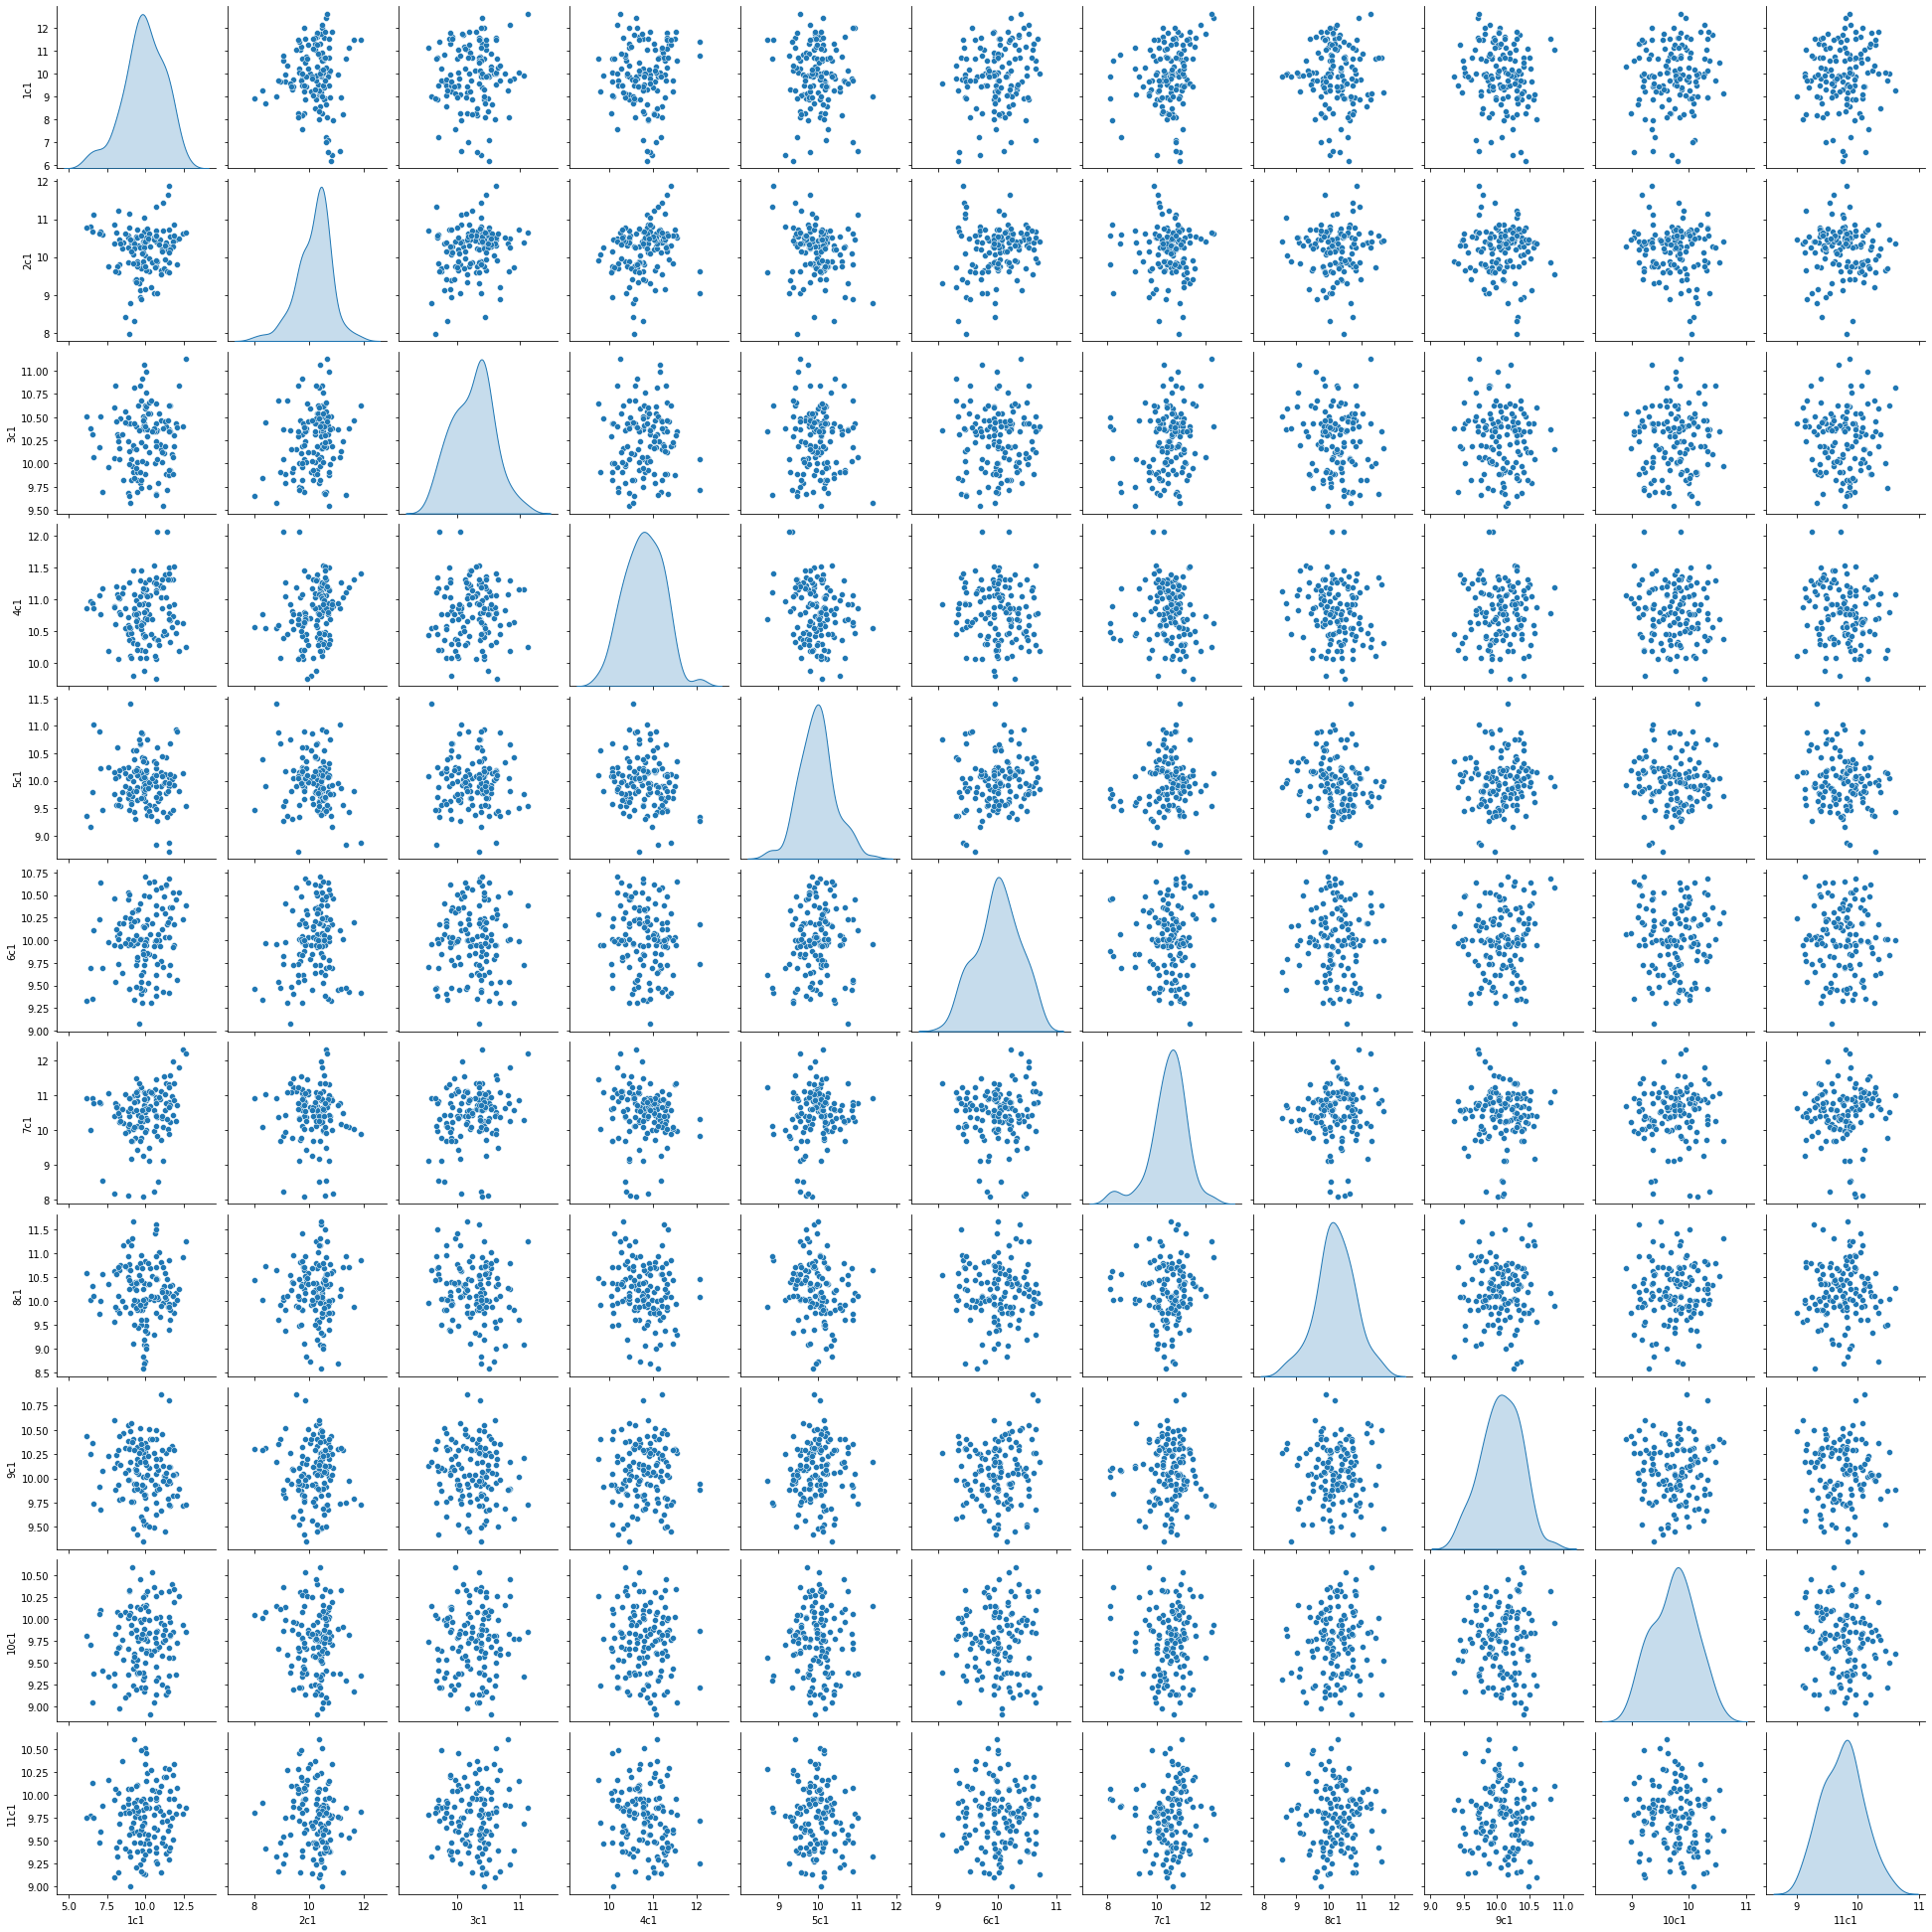

<Figure size 1152x1152 with 0 Axes>

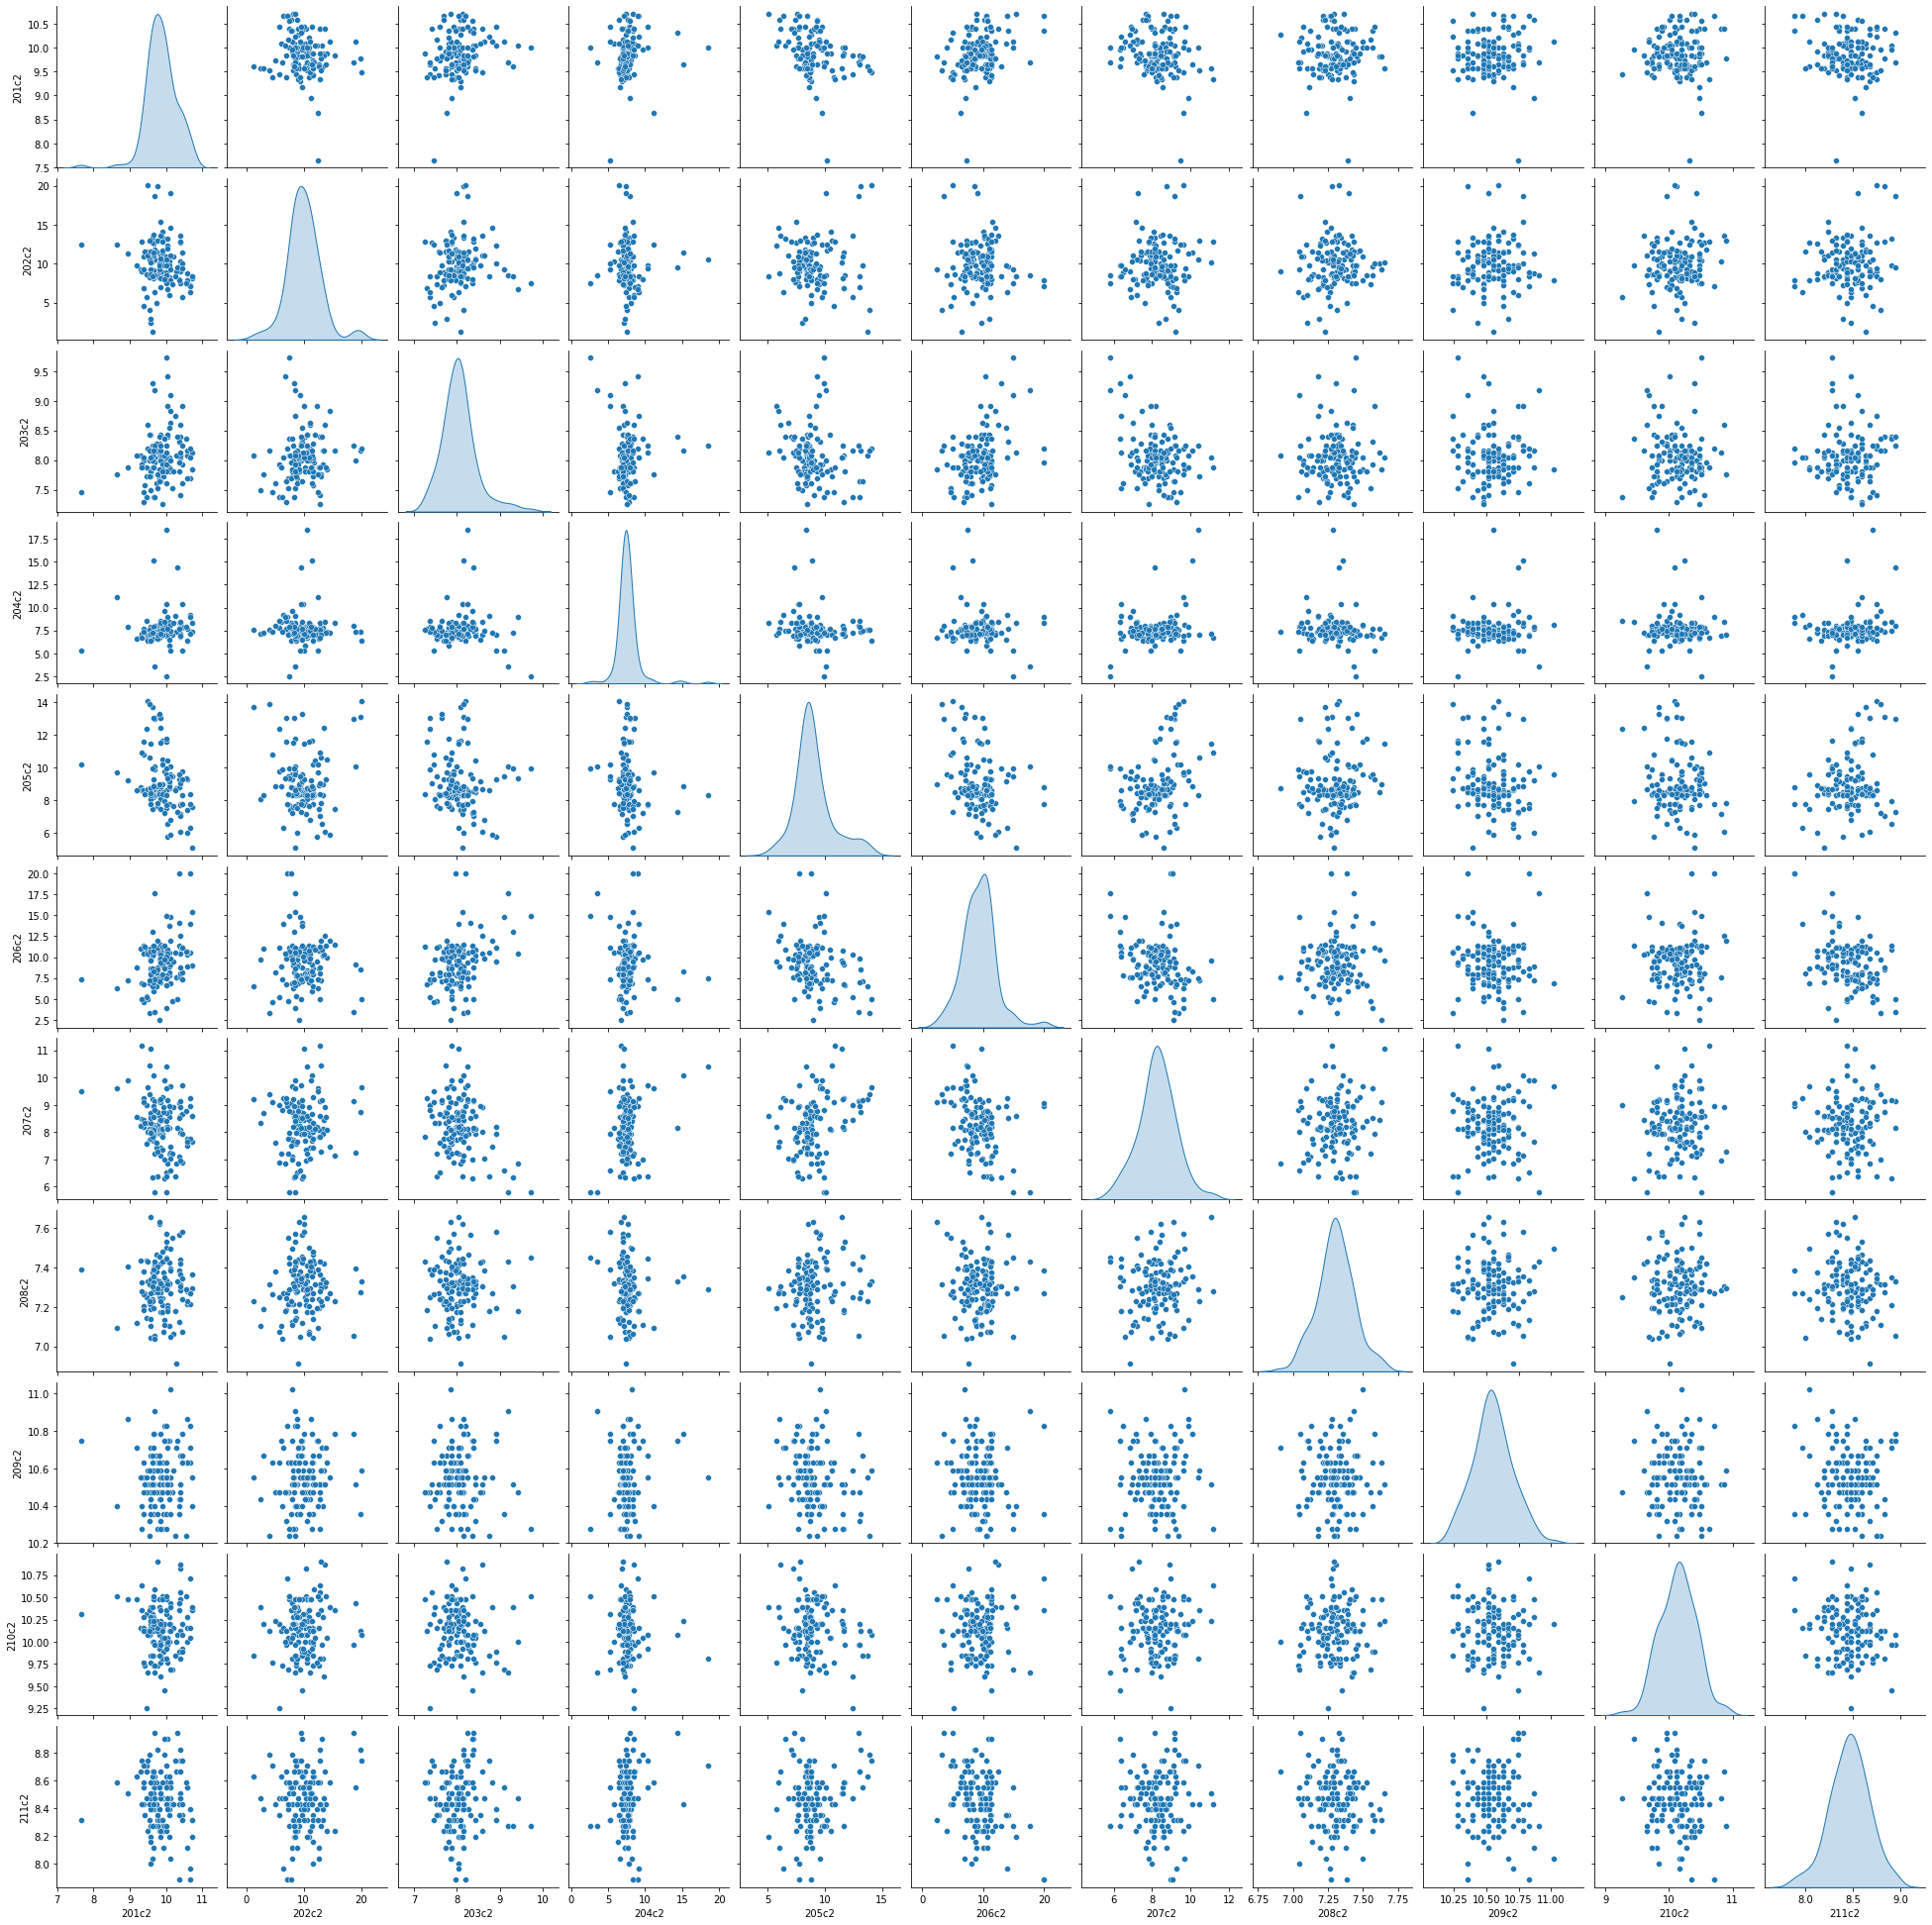

<Figure size 1152x1152 with 0 Axes>

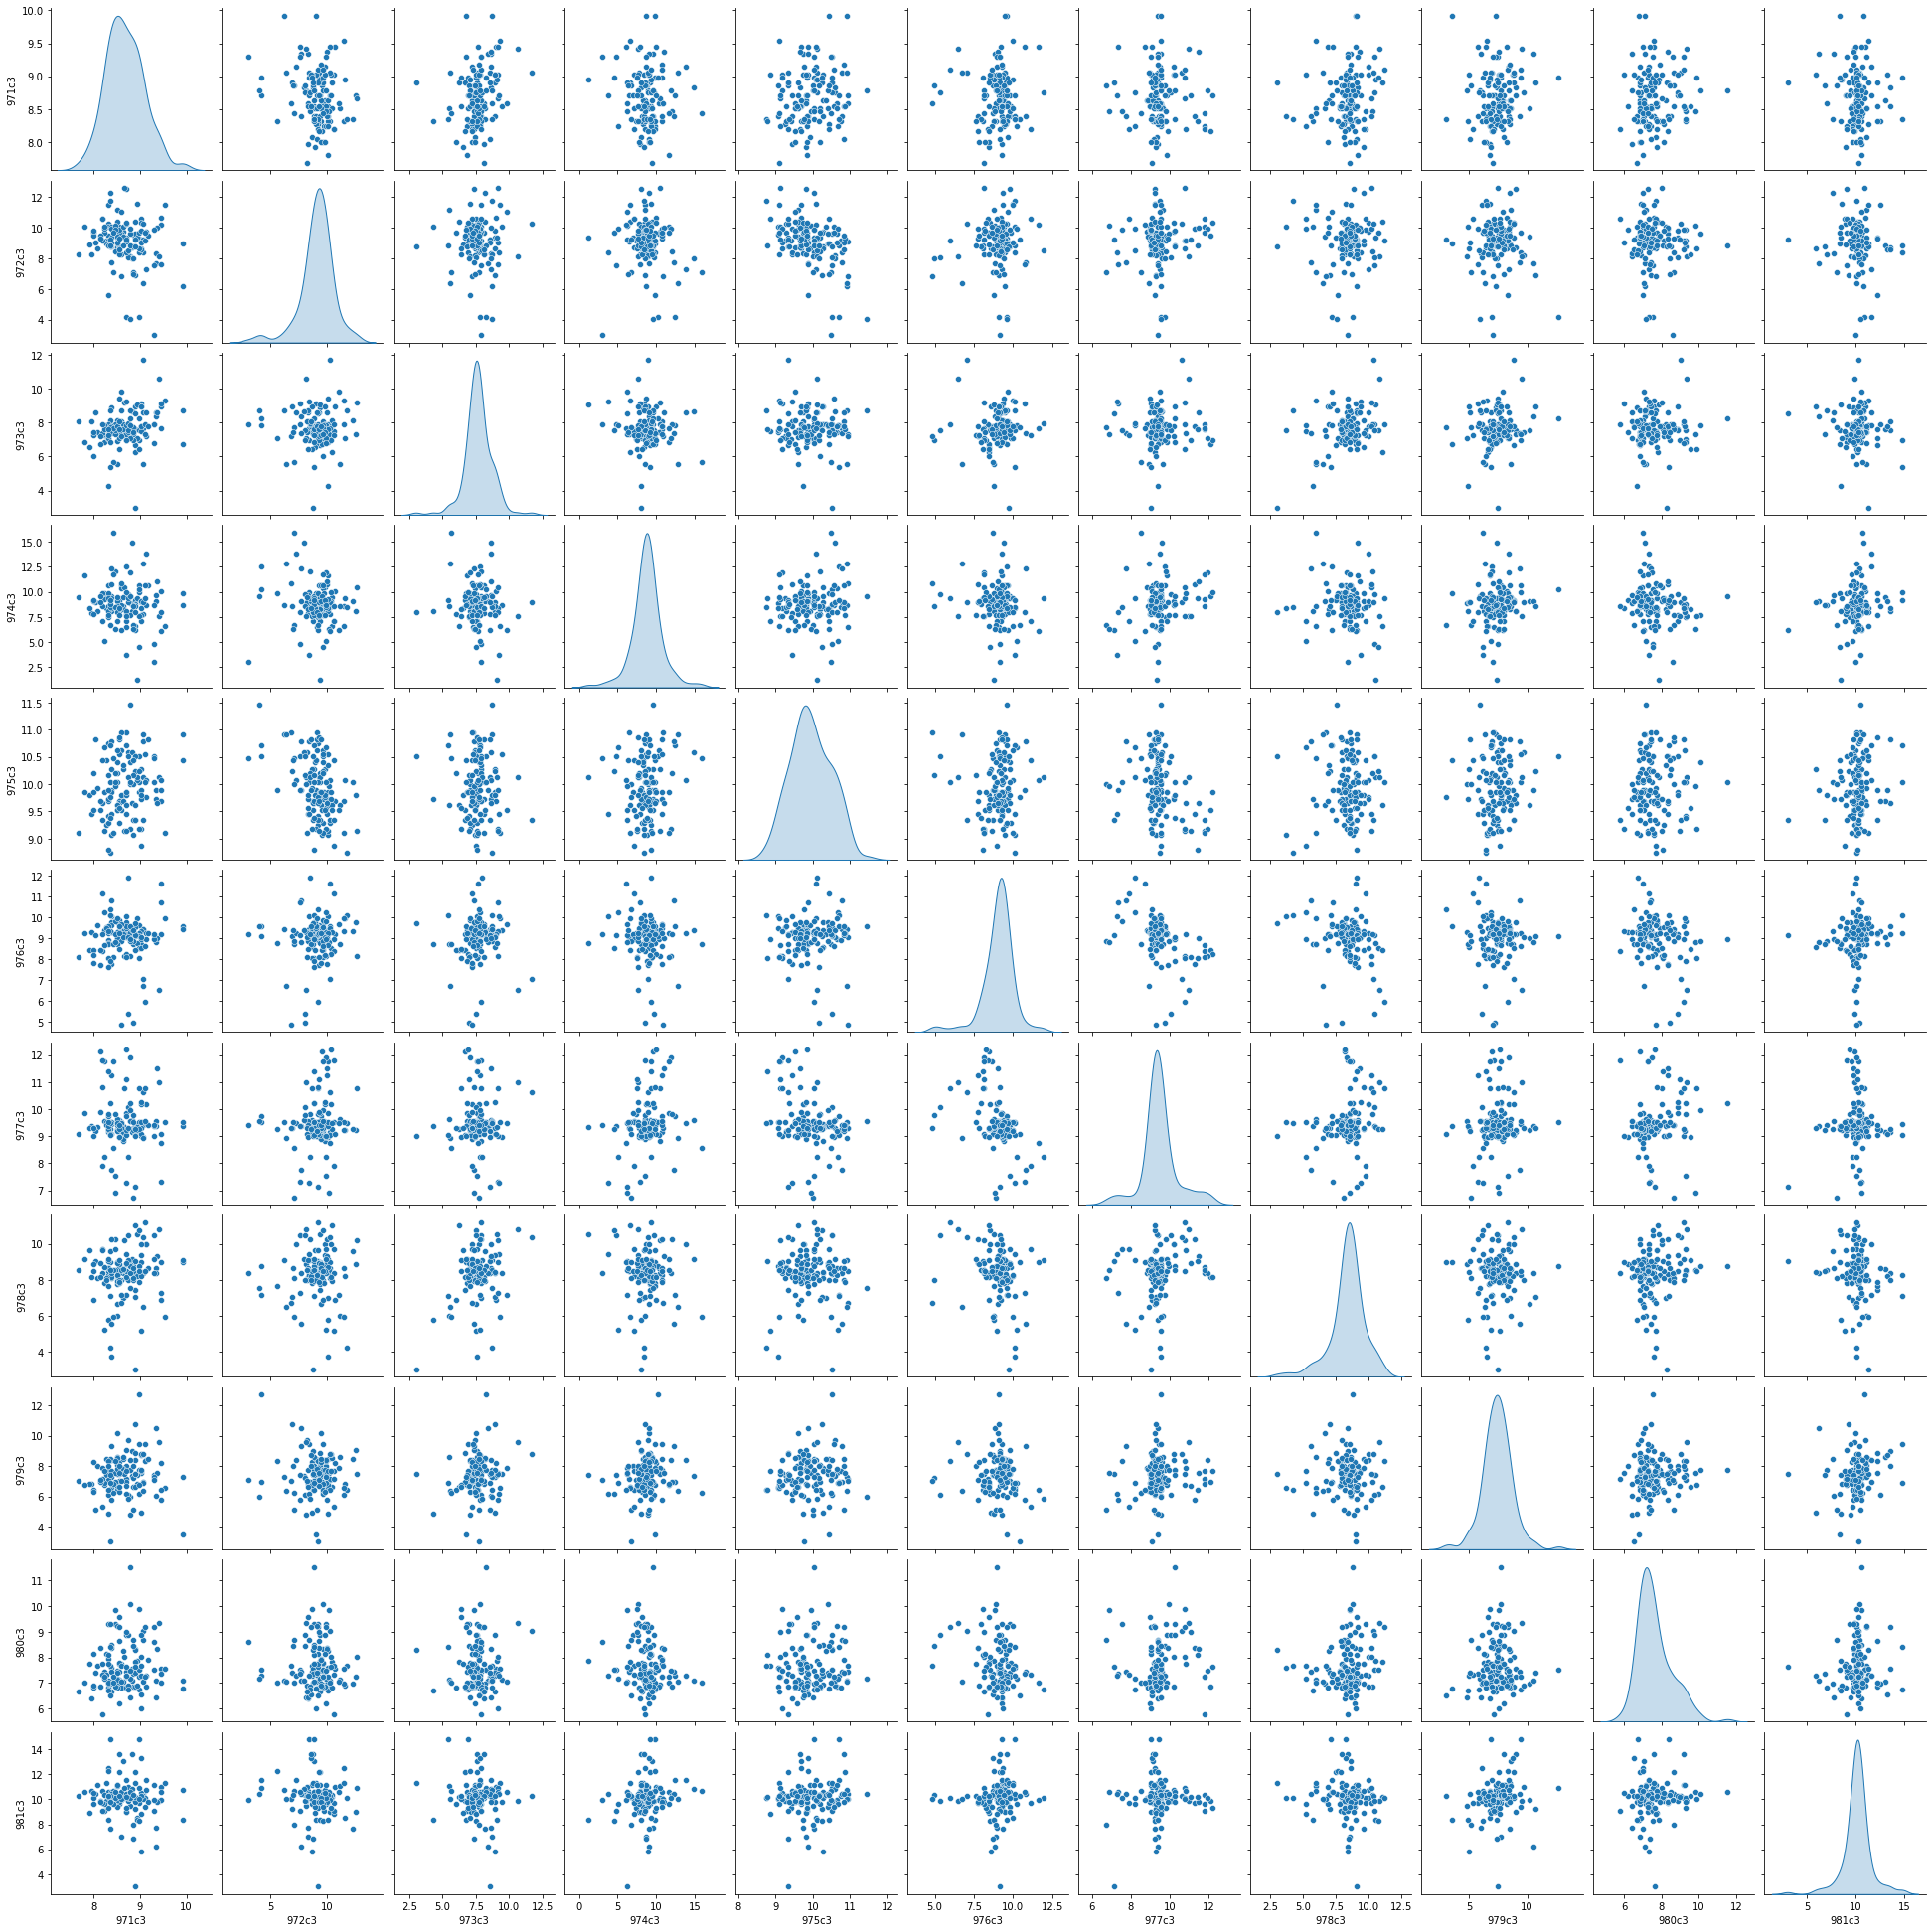

<Figure size 1152x1152 with 0 Axes>

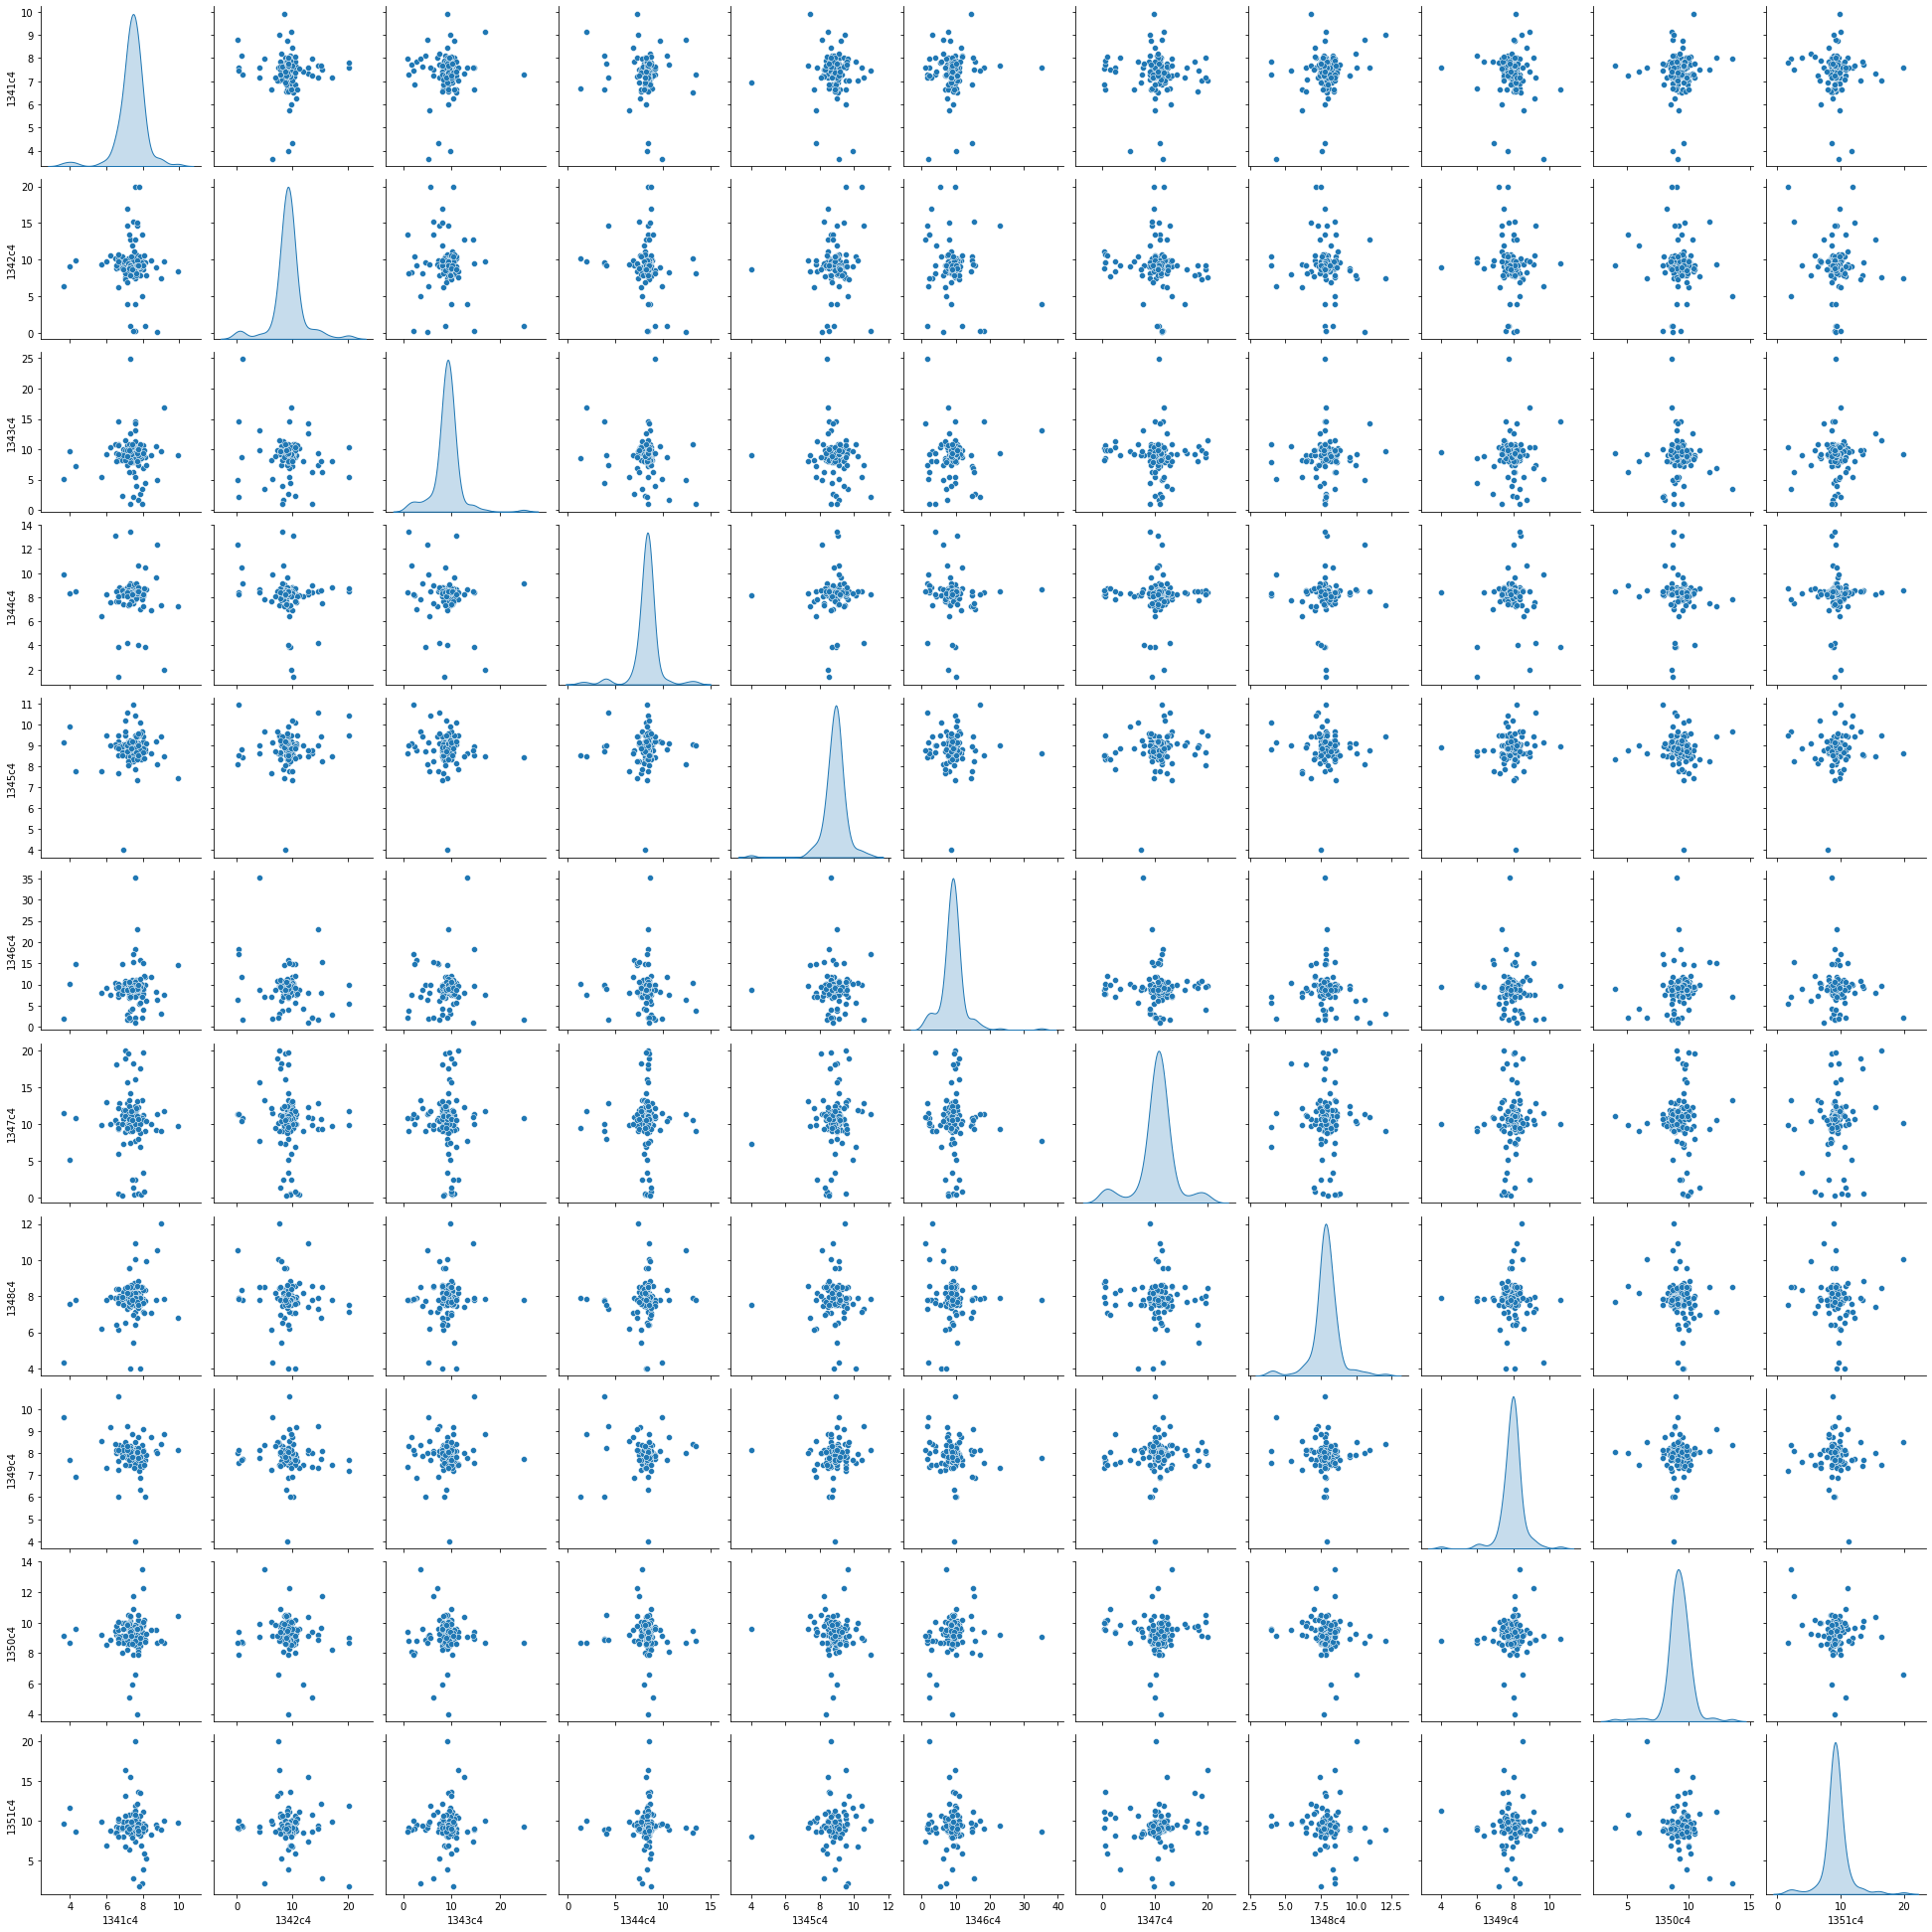

<Figure size 1152x1152 with 0 Axes>

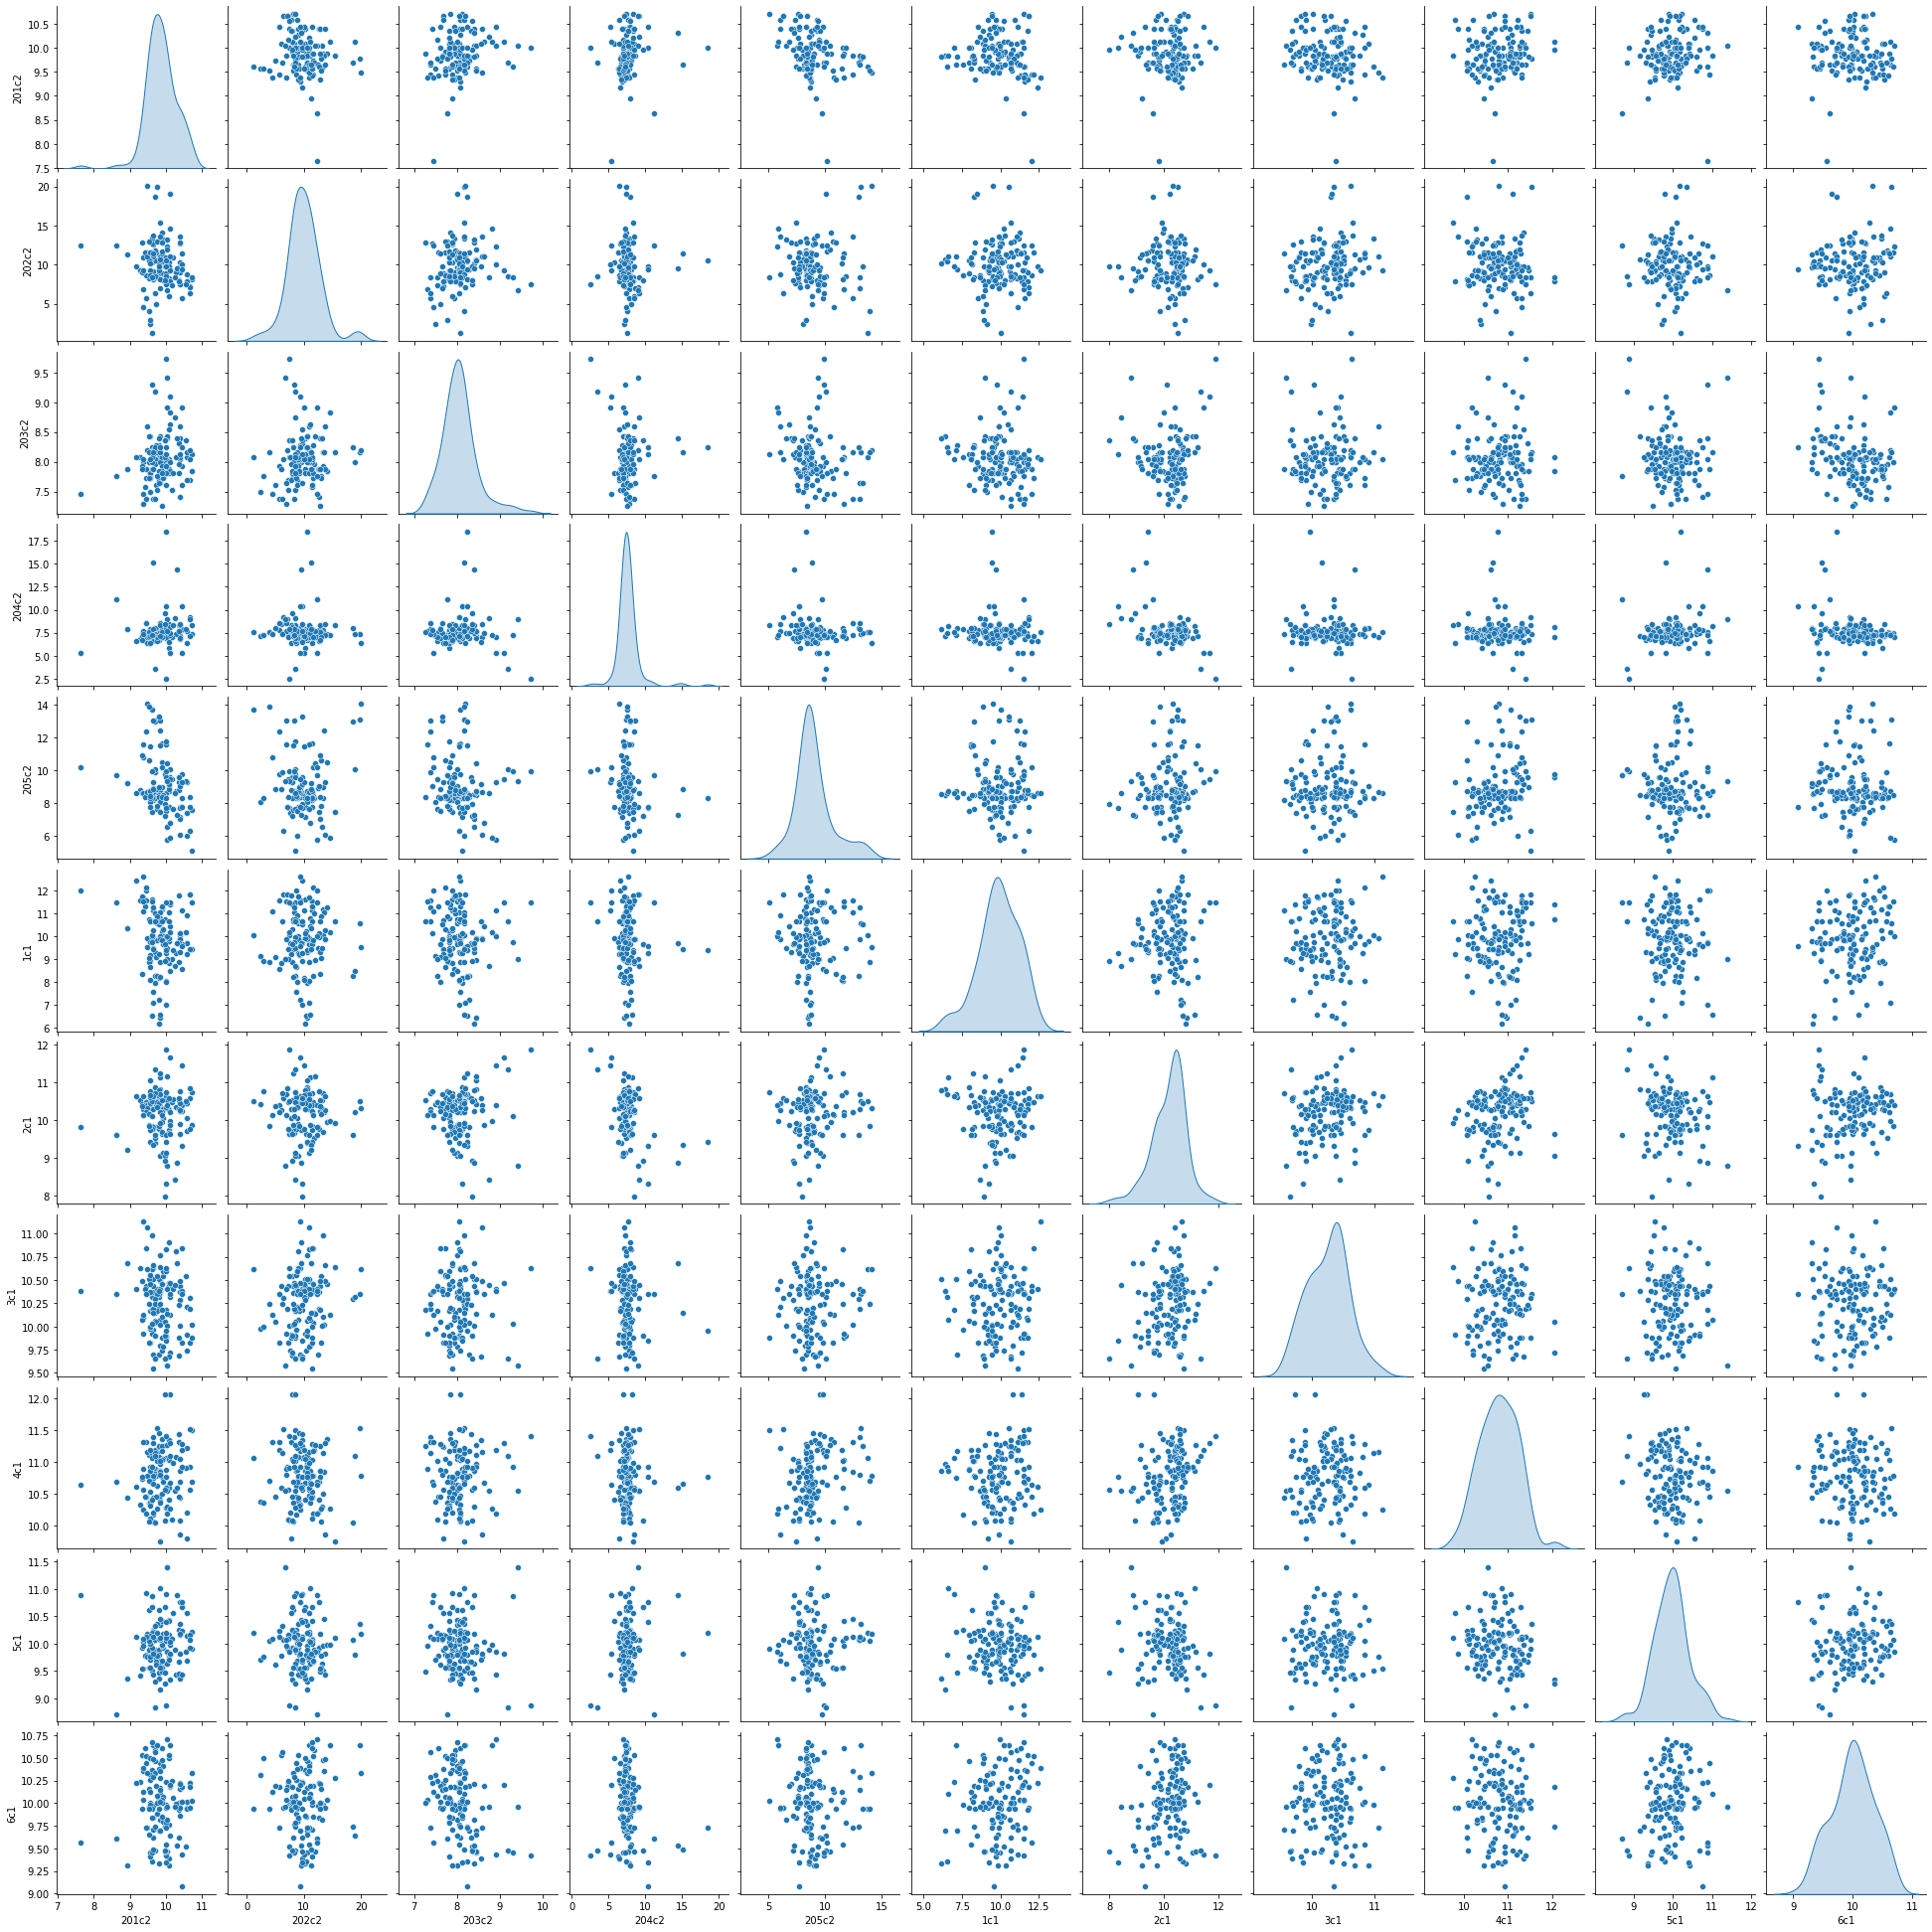

<Figure size 1152x1152 with 0 Axes>

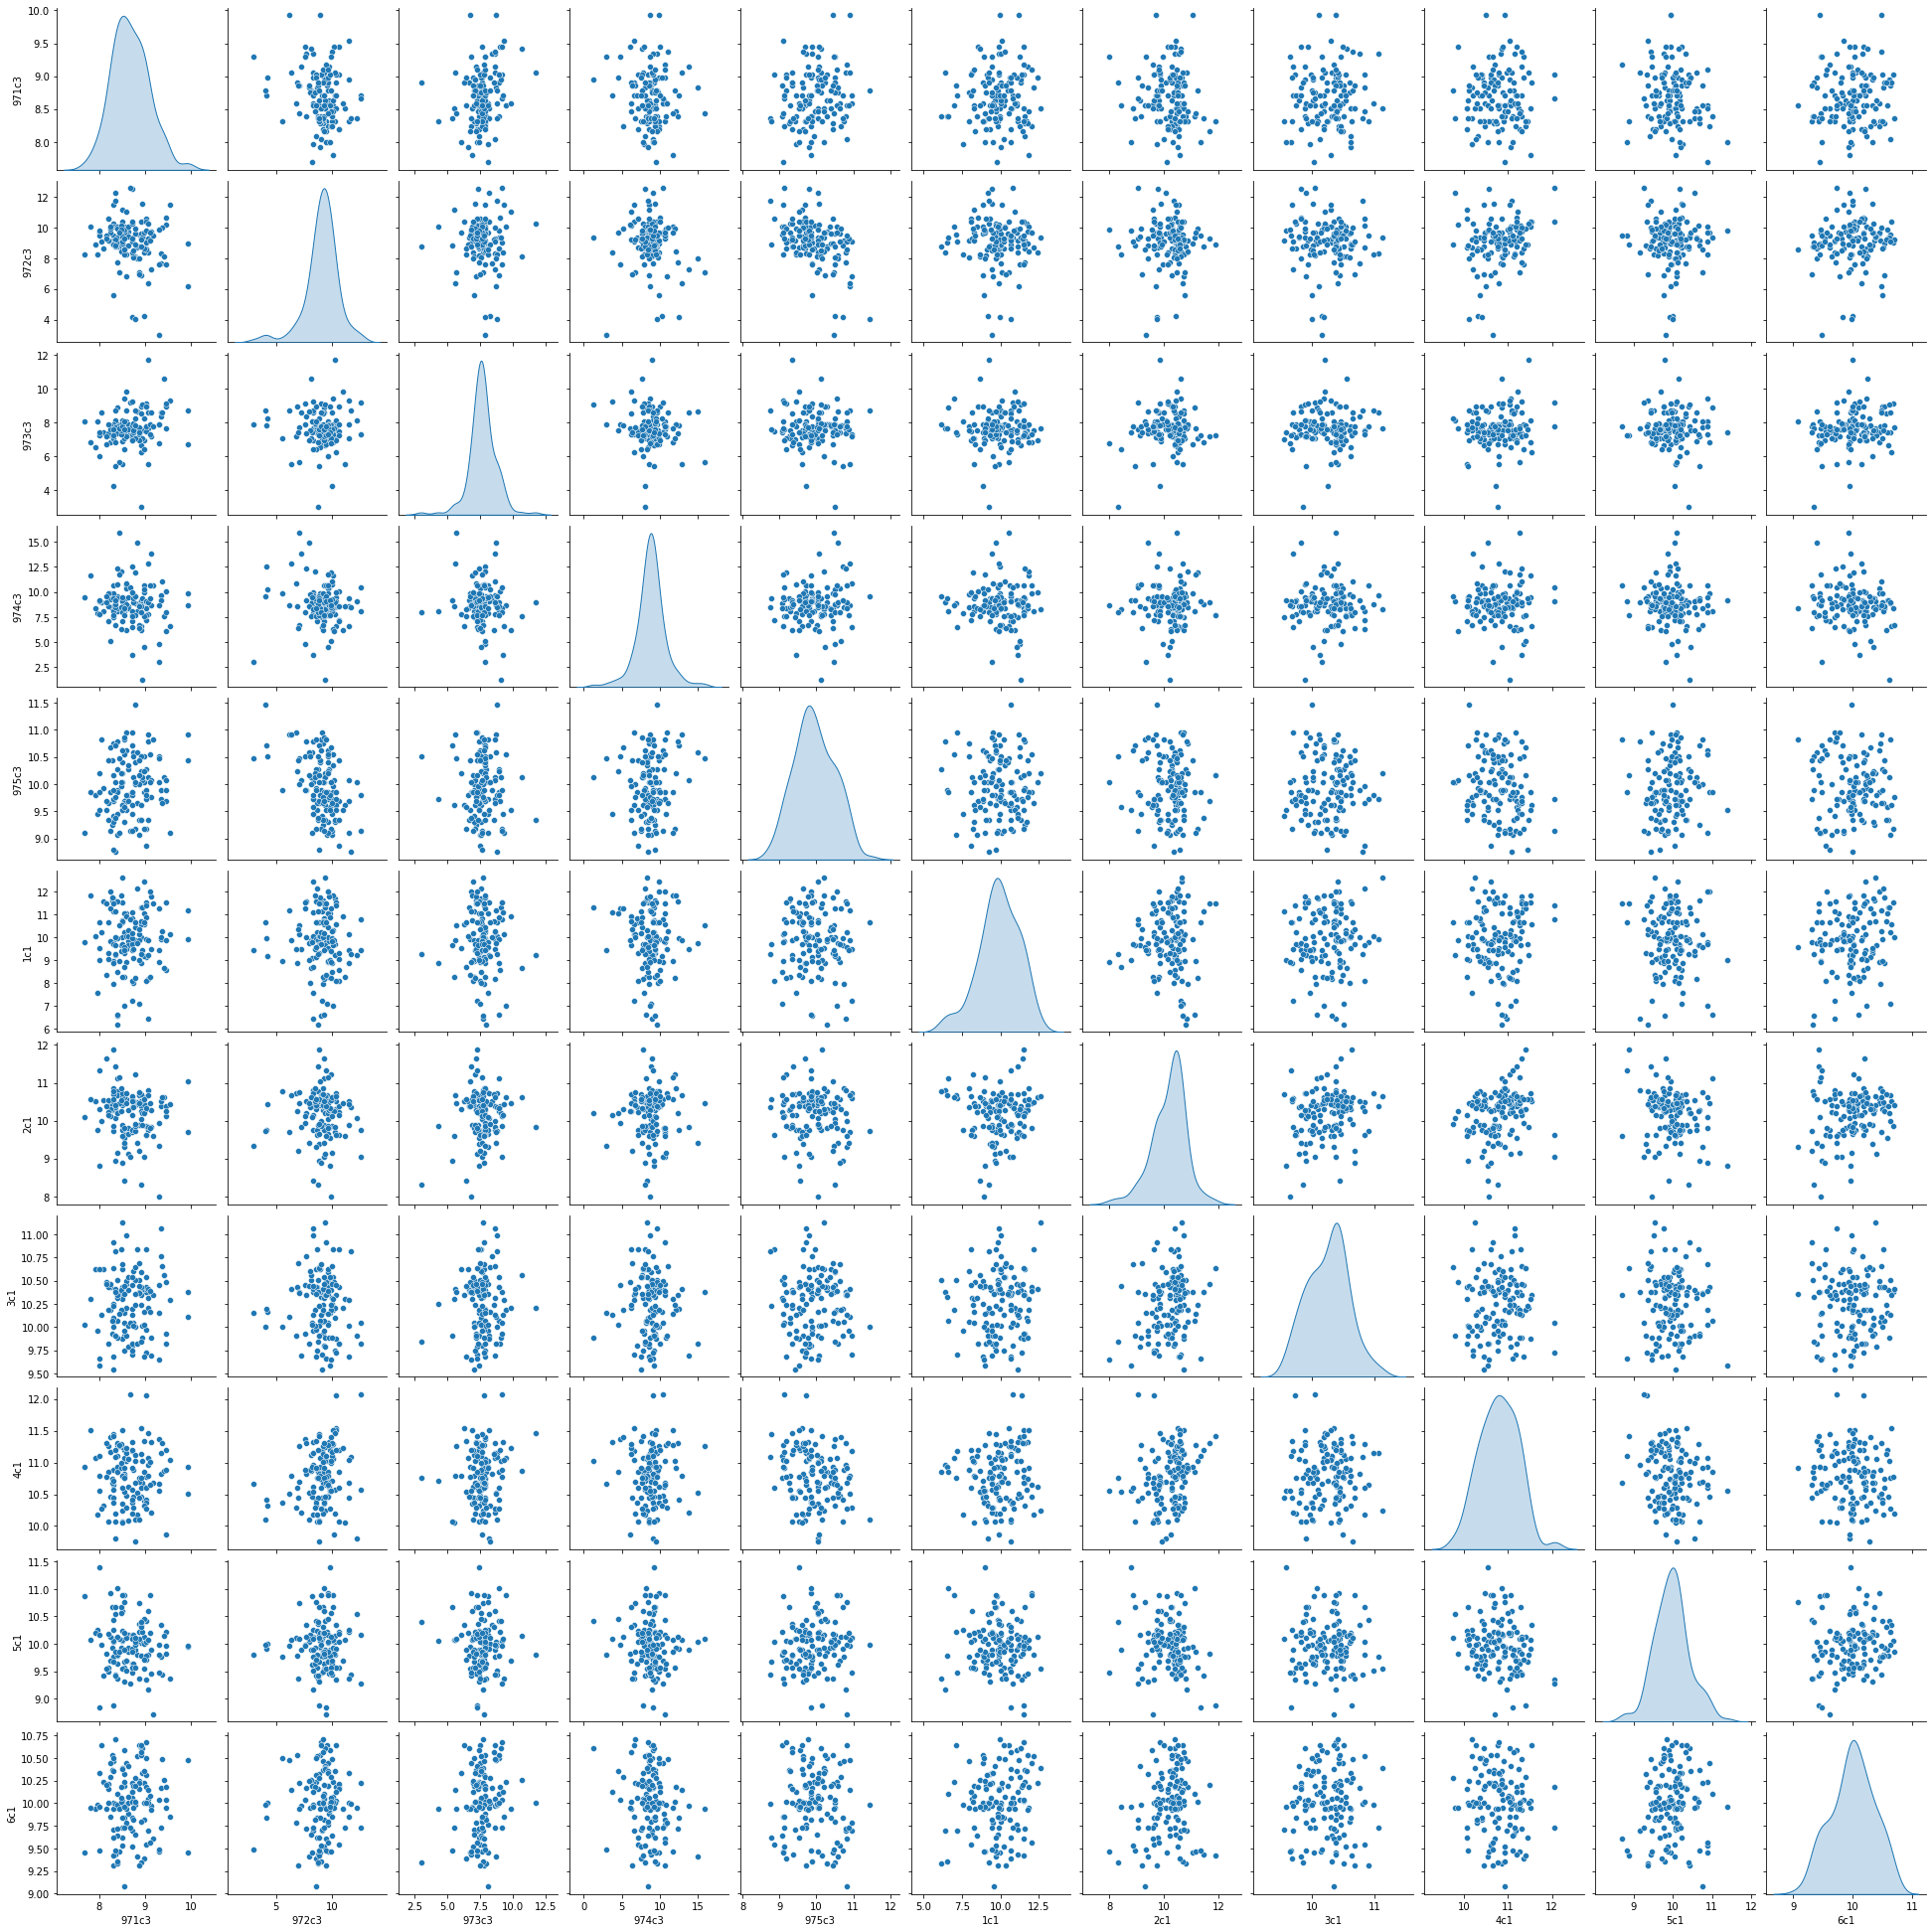

<Figure size 1152x1152 with 0 Axes>

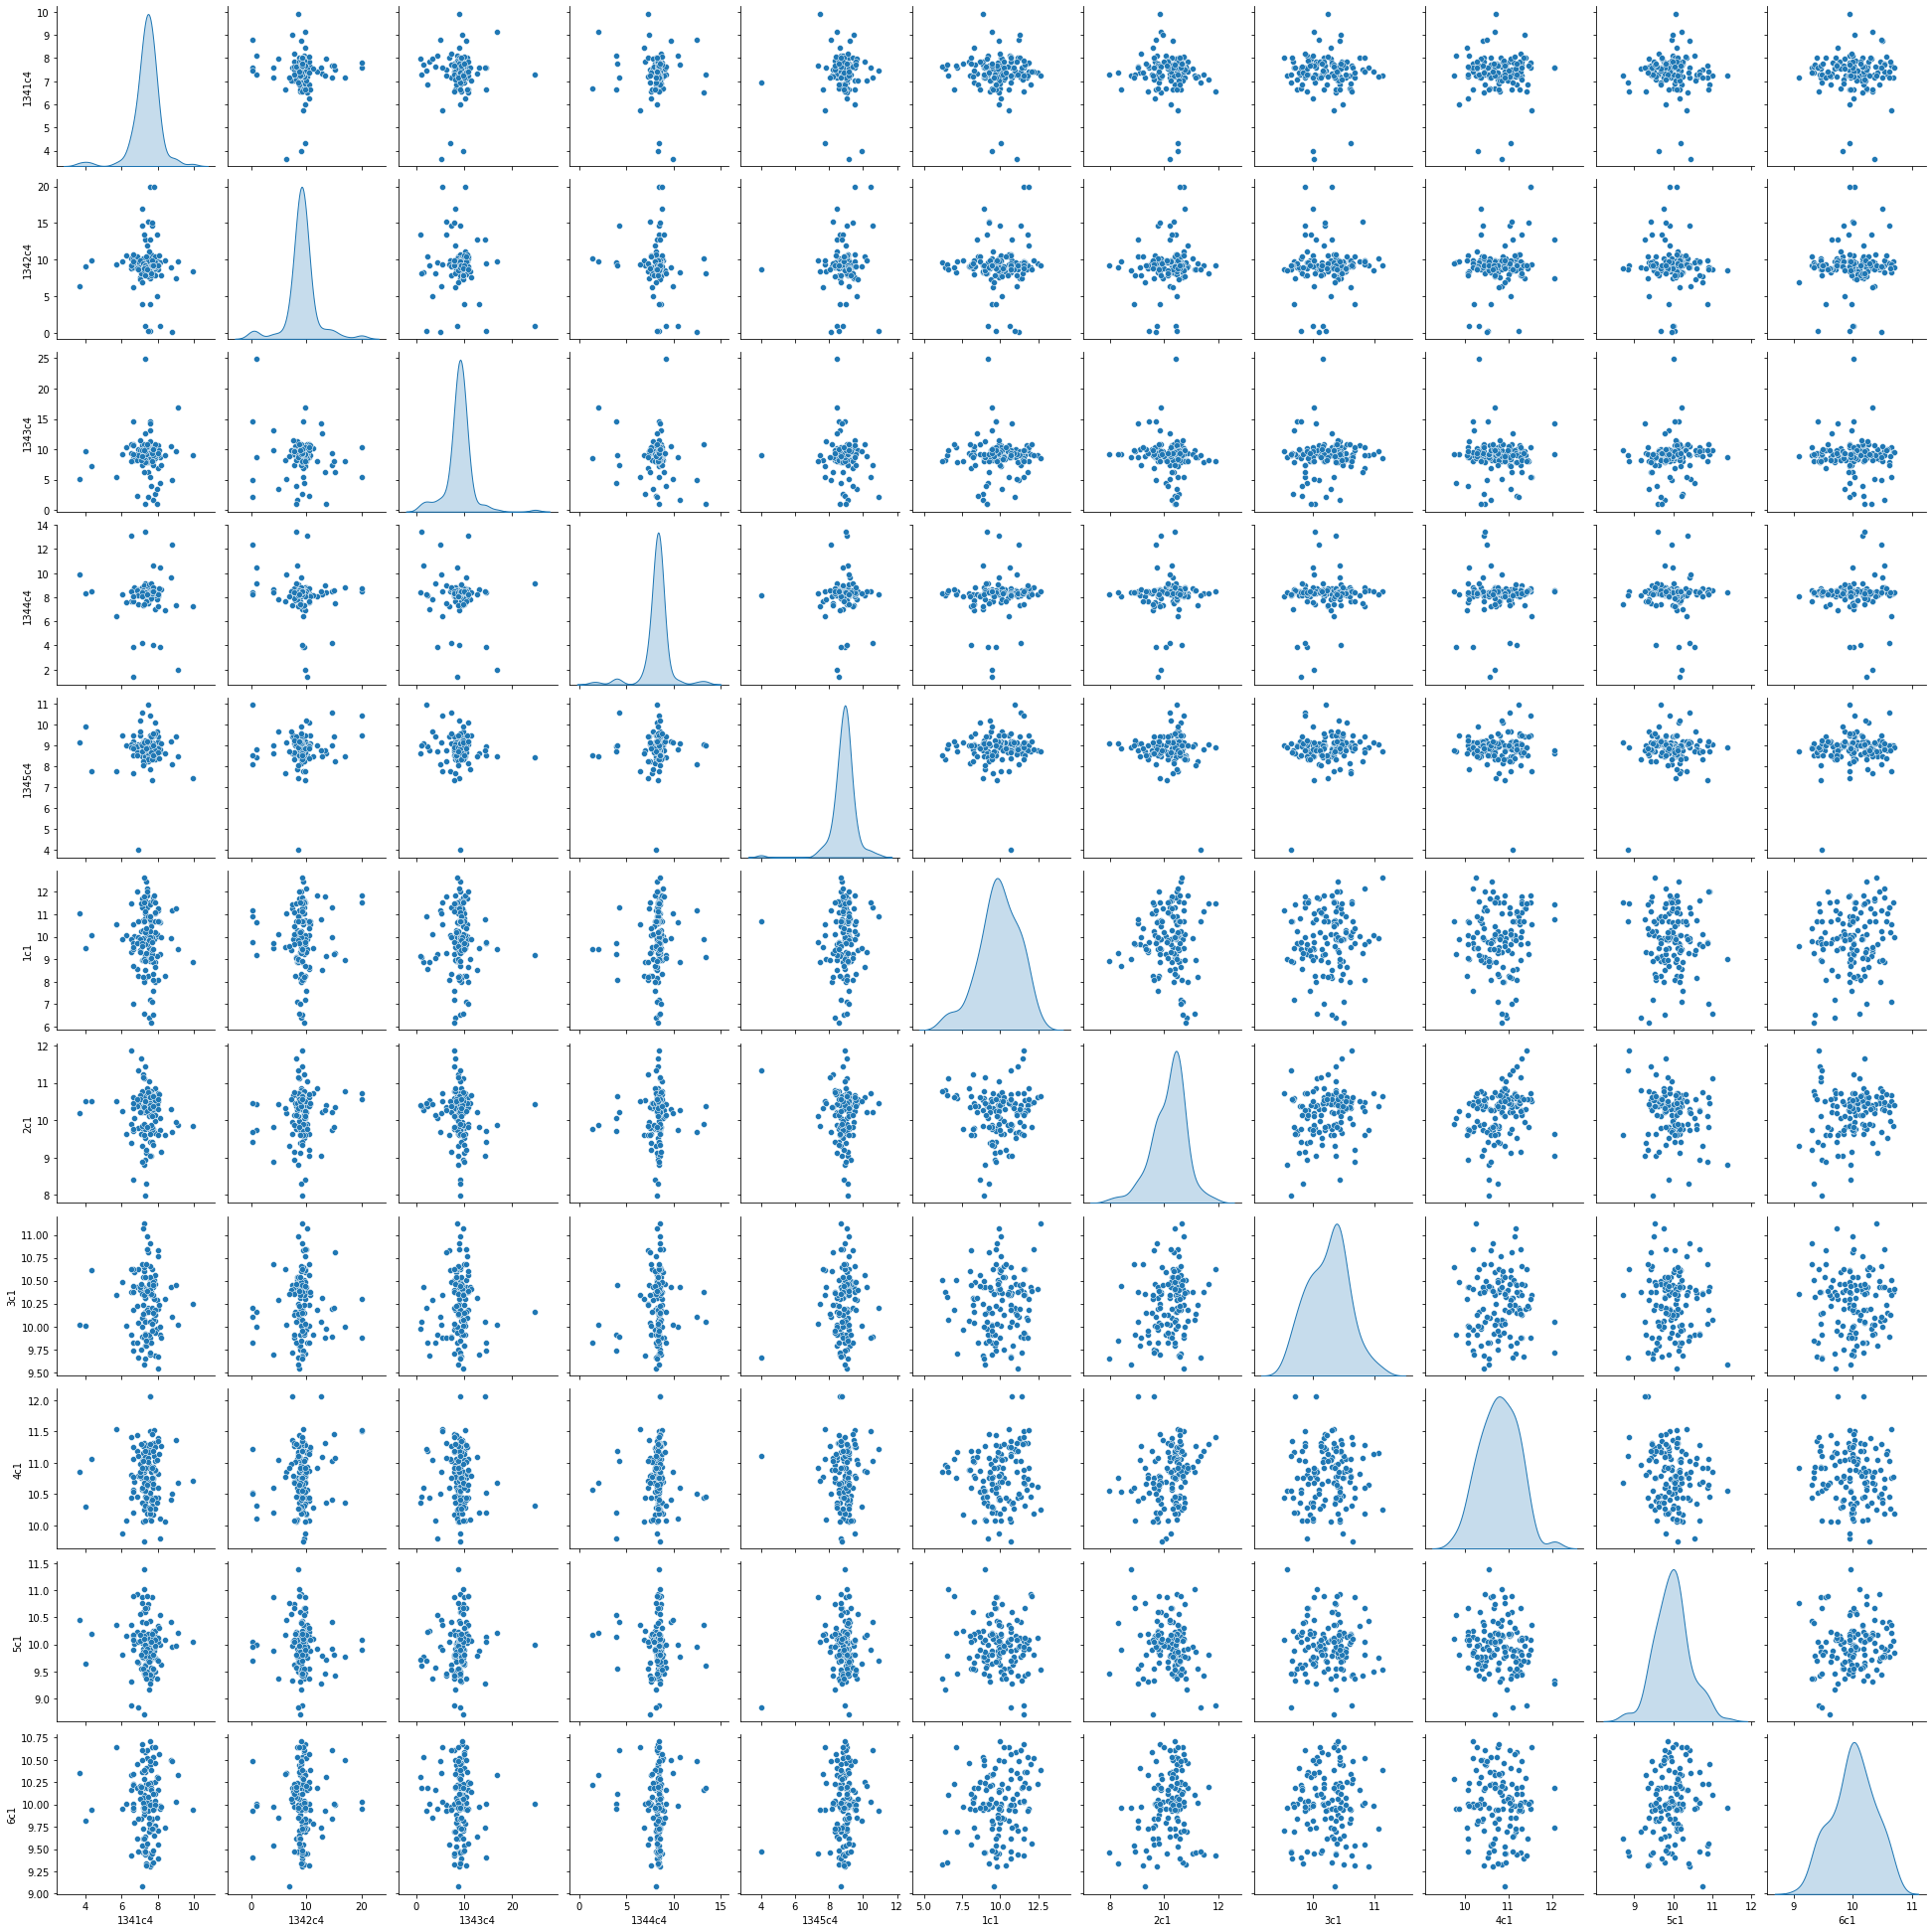

In [ ]:
input_filled_df = input_df.fillna(input_df.mean())

fig1 = plt.figure(figsize=(16,16));
sns.pairplot(input_filled_df.iloc[:,np.hstack((range(0,11)))],diag_kind = 'kde', palette='Set1');
fig2 = plt.figure(figsize=(16,16));
sns.pairplot(input_filled_df.iloc[:,np.hstack((range(200,211)))],diag_kind='kde',palette='Set1');
fig3 = plt.figure(figsize=(16,16));
sns.pairplot(input_filled_df.iloc[:,np.hstack((range(970,981)))],diag_kind='kde',palette='Set1');
fig4 = plt.figure(figsize=(16,16));
sns.pairplot(input_filled_df.iloc[:,np.hstack((range(1340,1351)))],diag_kind='kde',palette='Set1');
fig5 = plt.figure(figsize=(16,16));
sns.pairplot(input_filled_df.iloc[:,np.hstack((range(200,205), range(0,6)))],diag_kind='kde',palette='Set1');
fig6 = plt.figure(figsize=(16,16));
sns.pairplot(input_filled_df.iloc[:,np.hstack((range(970,975), range(0,6)))],diag_kind='kde',palette='Set1');
fig7 = plt.figure(figsize=(16,16));
sns.pairplot(input_filled_df.iloc[:,np.hstack((range(1340,1345), range(0,6)))],diag_kind='kde',palette='Set1');

These correlation plots indicate little to no correlation between the data

Now lets plot the heatmap of the raw data ignoring that they are timeseries' to study the correlation between the series

<Figure size 432x288 with 0 Axes>

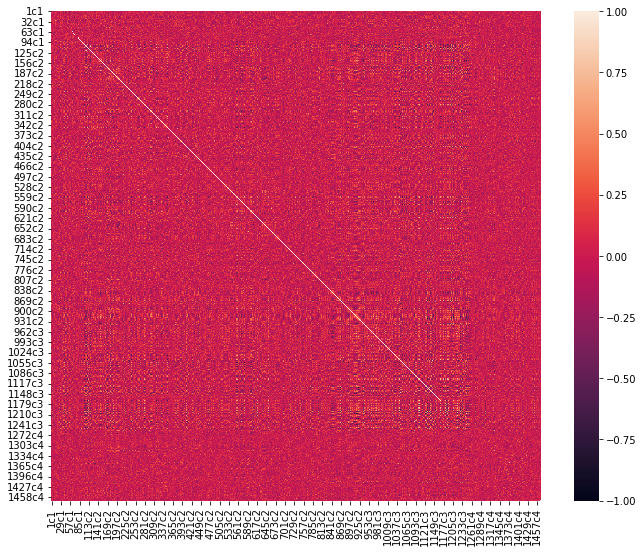

In [ ]:
plt.figure()
corrmat= input_df.corr()
f, ax= plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax= 1, vmin= -1, square= True)

The heatmap is uninterpretable because of large amount of entries

However the general red colour of the map again shows that there is a low positive or no correlation between the data from different series and different classes

So lets take a small sample including data of all types so we can get an understandable heatmap 

In [ ]:
sample_data= input_df.loc[:,['3c1', '4c1', '5c1','6c1', '7c1' ,'125c2', '126c2', '127c2','128c2', '129c2', '1024c3', '1025c3', '1026c3','1027c3', '1028c3','1365c4', '1366c4', '1367c4', '1368c4', '1369c4']]

<Figure size 432x288 with 0 Axes>

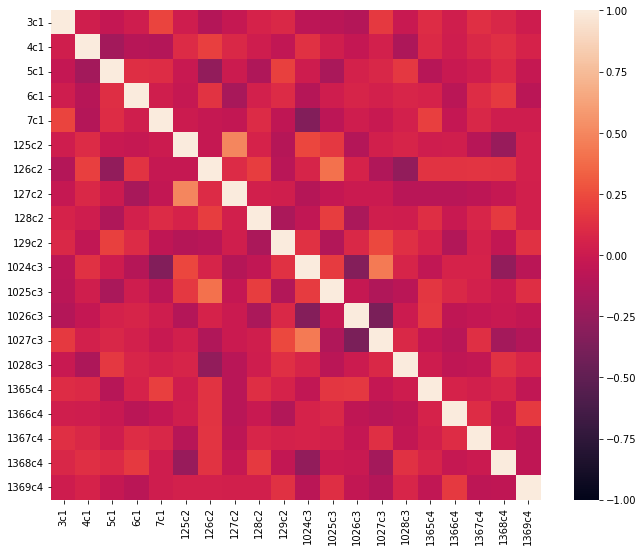

In [ ]:
plt.figure()
corrmat=sample_data.corr()
f, ax= plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax= 1, vmin= -1, square= True)

Thus, we can understand a lot about the data using basic statistical data analysis 

The low correlation between the data shows that it will be very difficult to reduce features in the data and reduce the dimensionality of the data

Since the given data is a timeseries, lets plot a timeseries plot of each of the above series categories


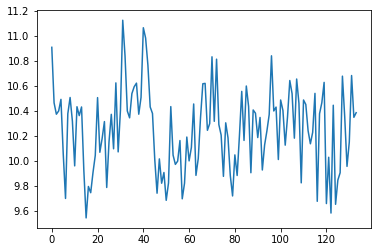

In [4]:
timeSeries1= input_df.loc[:, '3c1']
timeSeries2= input_df.loc[:, '125c2']
timeSeries3= input_df.loc[:, '1024c3']
timeSeries4= input_df.loc[:, '1365c4']

timeSeries1.plot()
plt.show()

Lets plot the ACF to get an idea of the correlation of the timeseries

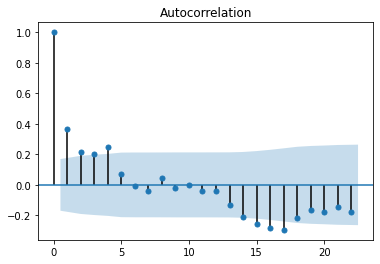

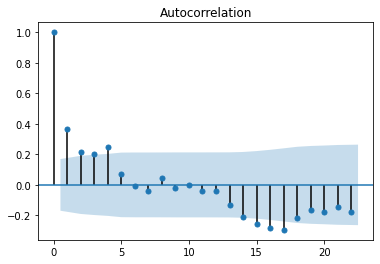

In [6]:
plot_acf(timeSeries1)

The Autocorrelation Function(ACF) plot for the function takes non-zero values at several different lags and thus we can conclusively say that the timeseries of class c1 is not random

Moreover, the correltation at lower lag is positive and continues going down with increase in lag

This suggests that the timeseries of class c1 has a very logn periodicity or no periodicity

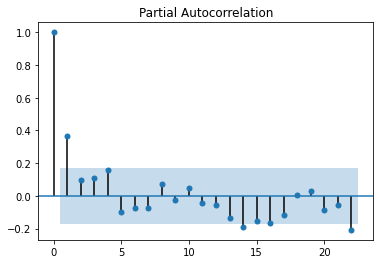

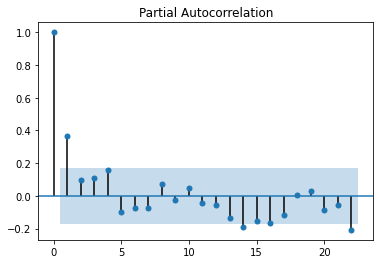

In [7]:
plot_pacf(timeSeries1)

A significant non zero correlation can be seen in the PACF (Partial ACF) plot as well

This suggests that there exists direct correlation in the data as well

Moreover, lag of 1 shows high value in the PACF as well

This time series is non-stationary. So lets make it into stationary timeseries using the difference between the values so that the data can be easier to model

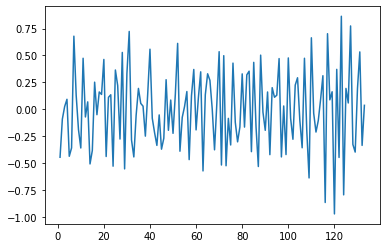

In [8]:
timeSeriesStat1= timeSeries1.diff()
timeSeriesStat1.plot()
plt.show()

Before plotting the ACF of the stationary time series, lets first get rid of all NaN values

In [9]:
timeSeriesStat1= timeSeriesStat1.dropna()

Lets do the same for all the series categories

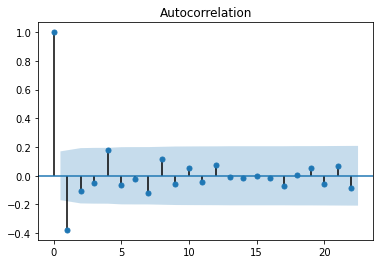

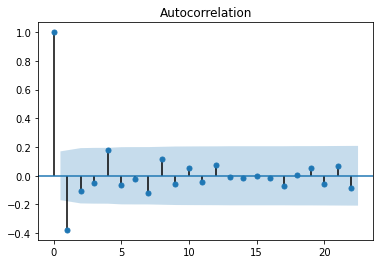

In [34]:
plot_acf(timeSeriesStat1)

The ACF of the stationary time series as expected has no trend and has its correlation alternating between positive and negative

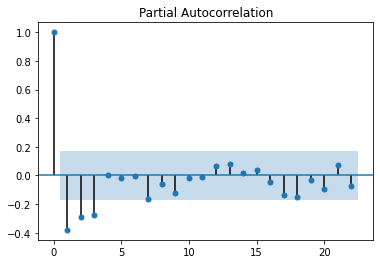

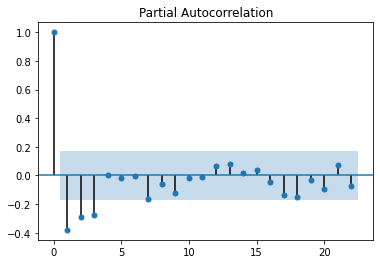

In [10]:
plot_pacf(timeSeriesStat1)

A similar observation can be made for the PACF of the stationary timeseries

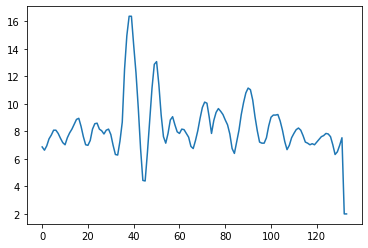

In [11]:
timeSeries2.plot()
plt.show()

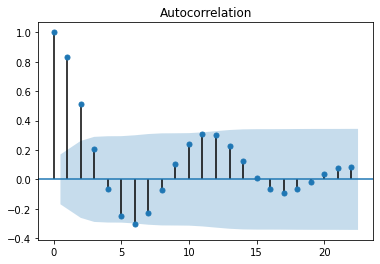

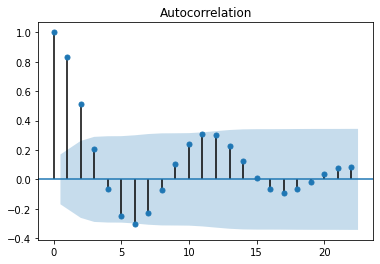

In [12]:
plot_acf(timeSeries2)

We can find the ACF of class c2 to be similar to a sinusoidal function however, we dont find a plot of autocorrelation being equal to 1 after lag=0

The periodicity of class c2 must also be large

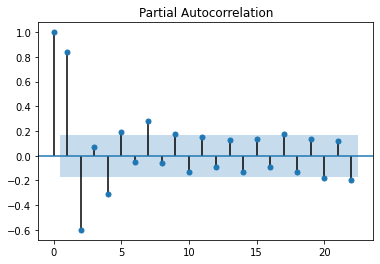

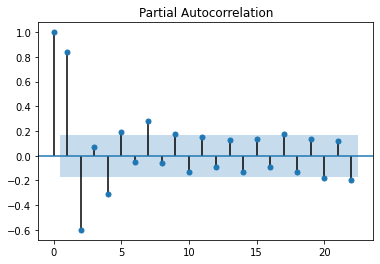

In [13]:
plot_pacf(timeSeries2)

The PACF of class c2 shows very high correlation at adjacent observation and very highly negative correlation at near adjacent observation 

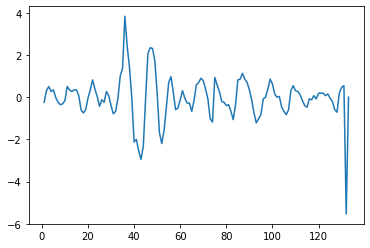

In [16]:
timeSeriesStat2= timeSeries2.diff()
timeSeriesStat2.plot()
plt.show()

In [19]:
timeSeriesStat2= timeSeriesStat2.dropna()

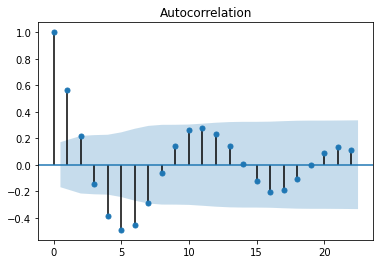

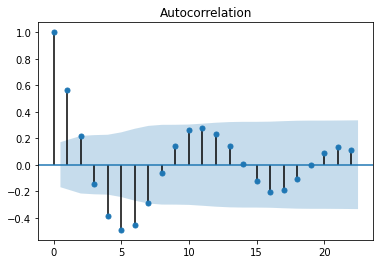

In [20]:
plot_acf(timeSeriesStat2)

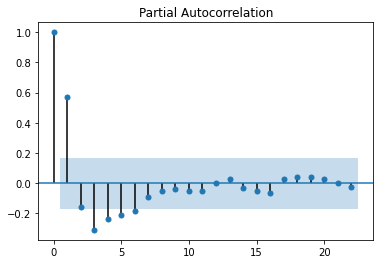

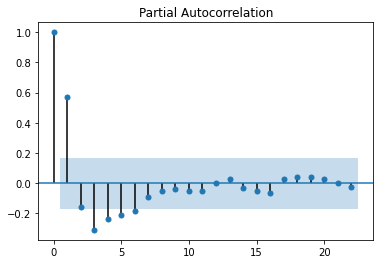

In [21]:
plot_pacf(timeSeriesStat2)

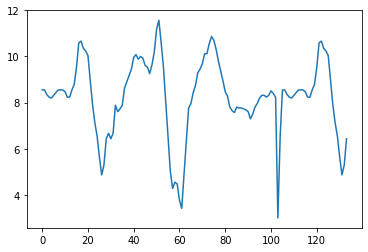

In [25]:
timeSeries3.plot()
plt.show()

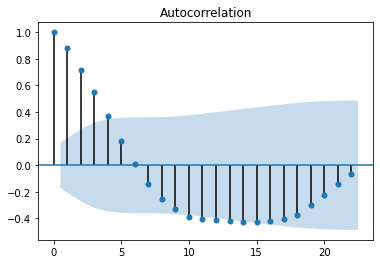

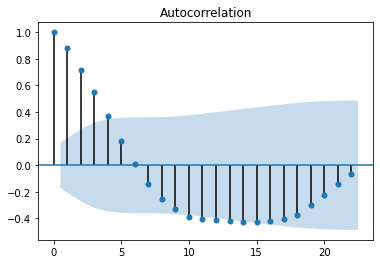

In [ ]:
plot_acf(timeSeries3)

A similar ACF and PACF can be noted for the class c3 as well

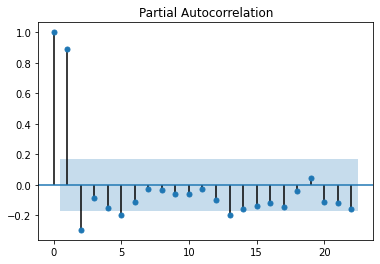

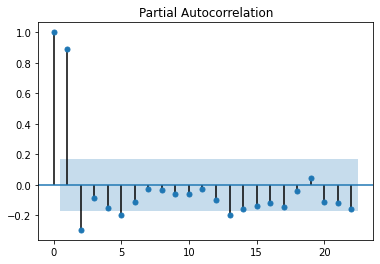

In [ ]:
plot_pacf(timeSeries3)

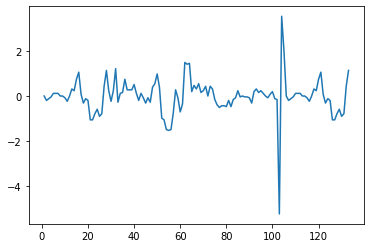

In [23]:
timeSeriesStat3= timeSeries3.diff()
timeSeriesStat3.plot()
plt.show()

In [24]:
timeSeriesStat3= timeSeriesStat3.dropna()

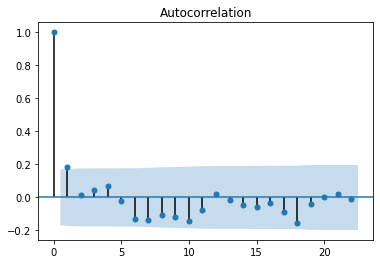

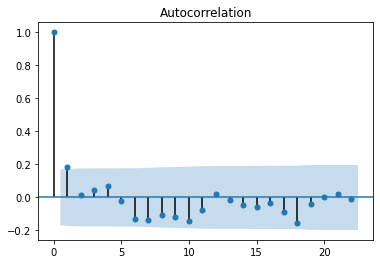

In [25]:
plot_acf(timeSeriesStat3)

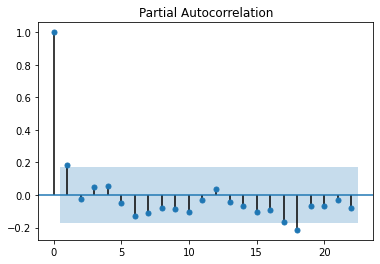

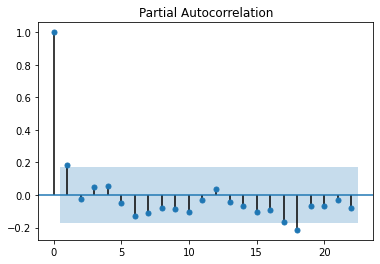

In [26]:
plot_pacf(timeSeriesStat3)

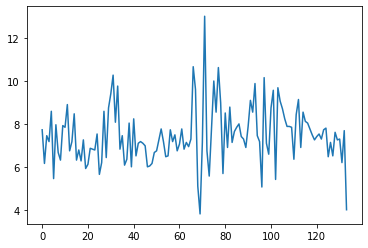

In [ ]:
timeSeries4.plot()
plt.show()

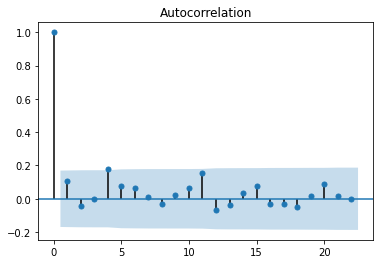

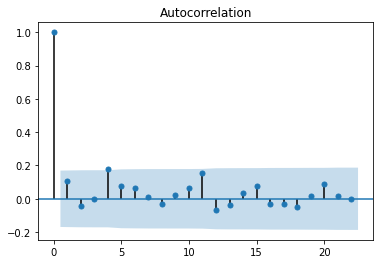

In [ ]:
plot_acf(timeSeries4)

The timeseries in class c4 has very small deviations from zero and the timeseries could be random.

However a small periodicity is seen in the ACF and PCF as the small non-zero values follow a sinusoidal function

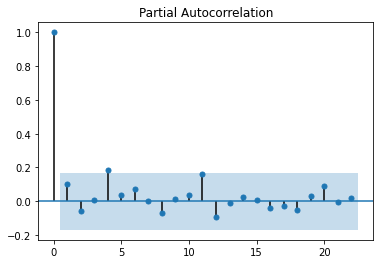

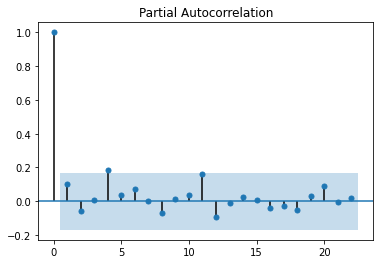

In [ ]:
plot_pacf(timeSeries4)

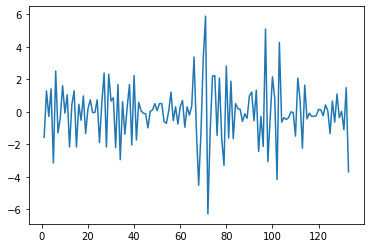

In [27]:
timeSeriesStat4= timeSeries4.diff()
timeSeriesStat4.plot()
plt.show()

In [28]:
timeSeriesStat4= timeSeriesStat4.dropna()

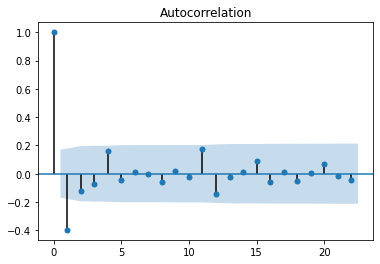

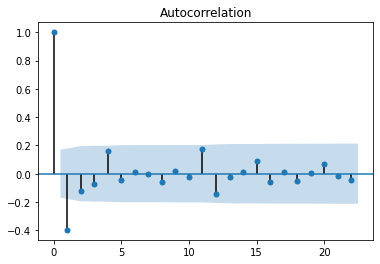

In [29]:
plot_acf(timeSeriesStat4)

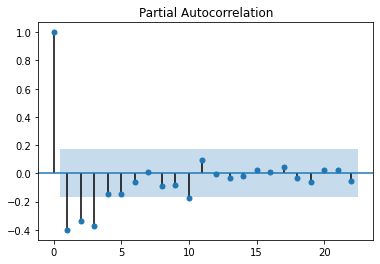

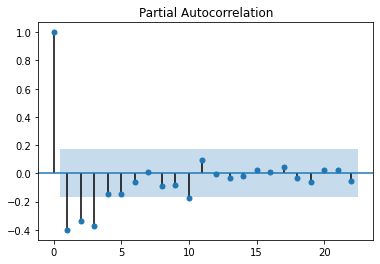

In [30]:
plot_pacf(timeSeriesStat4)

Thus we can see the difference in the time series of individual series categories 

This gives us a little insight into the timeseries